# **SpamSweep: Using Artificial Intelligence to Detect Spam SMS Messages**


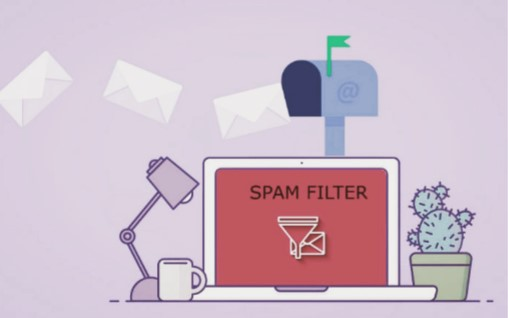

**Overview/Introduction:**
In our modern world, mobile devices and the use of Short Message Service (SMS) are everywhere. While this makes communication easier, it also brings the problem of spam messages. These unwanted texts can be annoying and even pose security risks like phishing. This project aims to use artificial intelligence to accurately spot and categorize these nuisance messages, providing a shield for users and improving their communication experience.

**Problem Statement:**
Spam messages are constantly changing to avoid detection, making them tricky to identify. We need to be able to spot these messages while making sure we don't wrongly label legitimate messages as spam, or miss any spam messages. Given the high volume of messages and speed they're sent at, doing this manually isn't possible. We need an automatic, accurate, and adaptable solution.

**Objectives:**
1.	Develop a machine learning model that correctly sorts SMS messages into spam or ham (legitimate) groups.
2.	Make sure the model can keep up with the changing nature of spam messages to keep its accuracy high over time.
3.	Lower the chance of wrongly labeling messages, so that legitimate messages aren't marked as spam and spam messages aren't missed.
4.	Test different algorithms to find the best one for this job.
5.	Help ongoing research in spam detection by offering a strong and scalable solution that could be used for other forms of digital communication too.

**Dataset Description:**
Context
The SMS Spam Collection is a carefully put together set of SMS messages, created specifically to help with SMS Spam detection research. It includes a total of 5,574 English SMS messages, each clearly marked as either ham (legitimate) or spam.
Content
The dataset is simple and clear. Each row is a separate message, split into two columns: 'v1' labels the message as spam or ham, and 'v2' contains the actual message text.
Source
The data has been collected from various sources, mainly free or focused on research:
1.	425 spam SMS messages were manually picked out from the Grumbletext website, a UK forum where mobile users talk about spam issues. This involved looking through hundreds of web pages to find the spam text.
2.	3,375 real SMS messages were randomly selected from the NUS SMS Corpus (NSC), a collection of around 10,000 real messages used for research at the National University of Singapore. These messages mostly come from students in Singapore.
3.	Another 450 real SMS messages were taken from Caroline Tag's Ph.D. thesis.
4.	Lastly, we used the SMS Spam Corpus v.0.1 Big, a public dataset with 1,002 real and 322 spam messages.




**Technologies Used**

- **Python**: A general-purpose programming language used to create the machine learning models.

- **Sklearn**: A Python library for machine learning which provides simple and efficient tools for data analysis and modeling.

- **TensorFlow**: An end-to-end open source platform for machine learning developed by Google Brain team.

- **TensorFlow Hub**: A library for the publication, discovery, and consumption of reusable parts of machine learning models.

- **Matplotlib**: A Python plotting library for creating static, animated, and interactive visualizations in Python.

- **NLTK (Natural Language Toolkit)**: Python library for working with human language data and performing natural language processing tasks.


**Methodology:**
The approach taken for this project was supervised learning for text classification, with a focus on using artificial intelligence to detect spam SMS messages. Different machine learning and deep learning models were employed, such as LSTM, Bidirectional LSTM, GRU, a simple dense network, a model based on the Neural Network Language Model (NNLM), and a model using the Universal Sentence Encoder (USE). Also included in our model list were Conv1D and Bidirectional GRU, along with a baseline model for comparison.


**Implementation:**
Our implementation began with the necessary preprocessing of text data, crucial for effective Natural Language Processing (NLP). This involved the removal of unwanted elements such as emojis, newline characters, URLs, mentions, and special characters, as well as the conversion of text to lowercase. The text was then further optimized for NLP by eliminating common stop words, retaining relevant hashtags, and applying lemmatization.

The first model created was a baseline model using the Multinomial Naive Bayes classifier with TF-IDF vectorization. Thereafter, models including simple dense, LSTM, Bidirectional LSTM, GRU, Bidirectional GRU, and Conv1D were created and trained on our dataset. A model was also designed using the Neural Network Language Model (NNLM), as well as another utilizing the Universal Sentence Encoder (USE) for the creation of the embedding layer.


**Results:**
A comprehensive evaluation of each model was undertaken using crucial performance metrics such as accuracy, precision, recall, F1-score, and loss. From this analysis, the simple dense network achieved a perfect score across all metrics, followed closely by the LSTM and the ensemble model, which was derived from a combination of different models. Models based on LSTM, Bidirectional GRU, and the USE also demonstrated impressive performance.


**Discussion/Interpretation of Results:**
Interestingly, the simple dense network demonstrated exceptional performance across all metrics, highlighting its effectiveness in text classification tasks for spam detection. Moreover, the LSTM model showed nearly perfect scores, asserting the potential of recurrent neural networks for these tasks. The ensemble model, derived from the combined strength of multiple models, secured the third position in performance, further validating the efficacy of ensemble methods in enhancing model robustness.


**Conclusion:**
The project highlighted the power of machine learning and deep learning models in text classification tasks, particularly in detecting spam SMS messages. A diverse range of architectures was explored, from simple dense networks to more complex structures like LSTM and GRU, as well as ensemble models. The results revealed that with carefully designed models, impressive accuracy can be achieved. Future work could explore improving these models further through more extensive data, refined preprocessing techniques, hyperparameter tuning, and exploration of different architectures and ensemble methods.

**Acknowledgment:**
The original dataset can be found here (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).


**Credits:**
1. Daniel Bourke: https://github.com/mrdbourke

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ham-spam-messages-dataset/spam-ham v2.csv


In [ ]:
# Import series of helper functions for the notebook
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-30 22:04:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-30 22:04:01 (60.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



**Import with Pandas**

The following code shows how to load a CSV file into a DataFrame and display the first 20 rows of the DataFrame. It uses the file path '/kaggle/input/ham-spam-messages-dataset/spam-ham v2.csv' to load the file and specifies the encoding as 'latin1' when reading the CSV.

In [ ]:
DATA_DIR='/kaggle/input/ham-spam-messages-dataset/spam-ham v2.csv'

In [ ]:
# Load CSV file into a DataFrame
df = pd.read_csv(DATA_DIR, encoding='latin1')

# Display the DataFrame
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


The next code renames the columns of the DataFrame from 'v1' to 'label' and from 'v2' to 'text'. It assigns the modified DataFrame to the variable 'df'.

In [ ]:
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The following code imports the 'matplotlib.pyplot' library for data visualization. It calculates the value counts of the 'label' column in the DataFrame and stores the counts in the 'category_counts' variable.

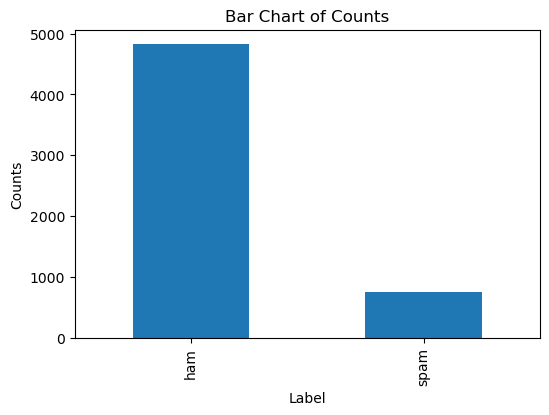

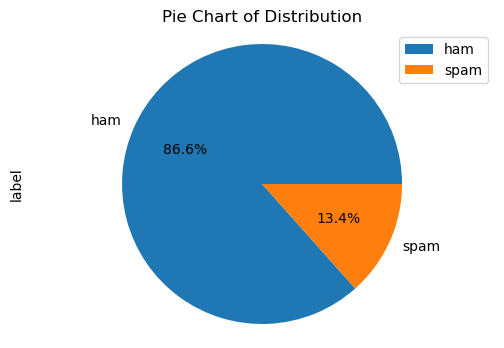

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of the 'label' column
category_counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Bar Chart of Counts')
plt.show()
print()

# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Distribution')

# Add legend
plt.legend()

plt.show()

**Duplicates and Missing Values**

After that, the code checks for missing values in the DataFrame using the 'isnull()' function and calculates the sum of missing values for each column. It prints the number of missing values for each column and the total number of missing values in the DataFrame.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 5572 data in this dataset
Number of Duplicates: 401
Number of Missing Values by column:
 label    0
text     0
dtype: int64
Number of Missing Values: 0


The code then imports the 'numpy' library as 'np' and replaces empty strings with NaN values in the DataFrame using 'df.replace("", np.nan, inplace=True)'. It calculates and prints the number of missing values and empty spaces for each column in the DataFrame.

In [ ]:
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

Number of Missing Values and Empty Spaces by column:
 label    0
text     0
dtype: int64


**Review Duplicates**

 The next code identifies duplicate rows in the DataFrame by finding rows that have duplicates across all columns. It sorts the duplicate rows based on all columns and selects the top 5 pairs of duplicates (10 rows) using 'sorted_duplicates.head(20)'.

In [ ]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)
top_5_duplicate_pairs

,label,text
1372,ham,"1) Go to write msg 2) Put on Dictionary mode 3)Cover the screen with hand, 4)Press &lt;#&gt; . 5)Gently remove Ur hand.. Its interesting..:)"
2162,ham,"1) Go to write msg 2) Put on Dictionary mode 3)Cover the screen with hand, 4)Press &lt;#&gt; . 5)Gently remove Ur hand.. Its interesting..:)"
2343,ham,"1) Go to write msg 2) Put on Dictionary mode 3)Cover the screen with hand, 4)Press &lt;#&gt; . 5)Gently remove Ur hand.. Its interesting..:)"
1469,ham,"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear"""
1778,ham,"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear"""
2980,ham,"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear"""
4554,ham,"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear"""
2369,ham,"A Boy loved a gal. He propsd bt she didnt mind. He gv lv lttrs, Bt her frnds threw thm. Again d boy decided 2 aproach d gal , dt time a truck was speeding towards d gal. Wn it was about 2 hit d gi..."
5104,ham,"A Boy loved a gal. He propsd bt she didnt mind. He gv lv lttrs, Bt her frnds threw thm. Again d boy decided 2 aproach d gal , dt time a truck was speeding towards d gal. Wn it was about 2 hit d gi..."
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur tear is my sorrow, a part of Ur heart is my life, a heart like mine wil care for U, forevr as my GOODFRIEND"


**Drop Duplicates**

This code removes duplicate rows from the DataFrame 'df'. Removing duplicate rows ensures that each row in the DataFrame is unique and eliminates redundant data, which can affect analysis and modeling.

In [ ]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


**Drop Missing Values**

This code drops rows containing missing values (NaN) from the DataFrame 'df'. Removing rows with missing values is important to ensure data quality and avoid errors or biased analysis caused by missing information.

In [ ]:
df = df.dropna()
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 121.2+ KB


**View random samples for each category**

This code defines a function 'random_sample_reviews' that takes a DataFrame 'df' and the number of samples to be extracted as input and returns a DataFrame with random samples from each group based on the 'label' column. This can be useful for data exploration, model training, or analysis.

In [ ]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'label' and then apply the sample function to 'text' of each group
    samples = df.groupby('label')['text'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    # samples_df = samples.reset_index()
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 100 characters
samples = random_sample_reviews(df, num_samples=10)
samples.head(20)

,label,text
0,ham,Cancel cheyyamo?and get some money back?
1,ham,Send this to ur friends and receive something about ur voice..... How is my speaking expression? 1.childish 2.naughty 3.Sentiment 4.rowdy 5.ful of attitude 6.romantic 7.shy 8.Attractive 9.funny &...
2,ham,Moji i love you more than words. Have a rich day
3,ham,Yes..gauti and sehwag out of odi series.
4,ham,"Maybe westshore or hyde park village, the place near my house?"
5,ham,Are you going to wipro interview today?
6,ham,"Especially since i talk about boston all up in my personal statement, lol! I woulda changed that if i had realized it said nyc! It says boston now."
7,ham,"As usual..iam fine, happy &amp; doing well..:)"
8,ham,I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the &lt;#&gt; day return period ended.
9,ham,"Excellent, I'll see what riley's plans are"


**Data Cleaning**

These follwoing functions perform various text cleaning operations such as removing emojis, links, mentions, punctuation, and extra spaces from text data. Text cleaning is an essential preprocessing step in natural language processing tasks as it helps remove noise, irrelevant characters, and standardize the text data for better analysis and modeling.

In [ ]:
# Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

This code applies a series of text cleaning functions to the 'text' column of the DataFrame 'df' and assigns the cleaned text to a new column 'text1'.

In [ ]:
df['text1'] = (df['text']
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

In [ ]:
df.head()

,label,text,text1
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


This code creates a DataFrame 'df_comparison'.This DataFrame will be used to compare the original and cleaned text data and analyze the impact of text cleaning on the text length.

In [ ]:
df_comparison = pd.DataFrame()

# Original text and its length
df_comparison['pre-clean text'] = df['text']
df_comparison['pre-clean len'] = df['text'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comparison['post-clean text'] = df['text1']
df_comparison['post-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

df_comparison.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",20,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,20
1,Ok lar then Joking wif u oni,7,ok lar then joking wif u oni,7
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,28,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,28
3,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say,11
4,"Nah I don't think he goes to usf, he lives around here though",13,nah i dont think he goes to usf he lives around here though,13
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",32,freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send 150 to rcv,32
6,Even my brother is not like to speak with me. They treat me like aids patent.,16,even my brother is not like to speak with me they treat me like aids patent,16
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,26,as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune,26
8,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,26,winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only,26
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,29,had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030,29


Remove Stopwords

This next code defines a function 'remove_stopwords' that takes a sentence as input and removes common stopwords from it. Removing stopwords can help eliminate words that carry little semantic meaning and improve the quality of text analysis or modeling tasks.

In [ ]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


This code applies the 'remove_stopwords' function to the 'text1' column of the DataFrame 'df' and assigns the stopwords-removed text to a new column 'text2'.

In [ ]:
df['text2'] = (df['text1'].apply(remove_stopwords))

The following code creates a DataFrame 'df_comp' and will be used to compare the original and stopwords-removed text data and analyze the impact of removing stopwords on the text length.

In [ ]:
df_comp = pd.DataFrame()

# Original text and its length
df_comp['pre-clean text'] = df['text1']
df_comp['pre-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comp['post-clean text'] = df['text2']
df_comp['post-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

df_comp.head(20)

,pre-clean text,pre-clean len,post-clean text,post-clean len
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,20,go jurong point crazy available bugis n great world la e buffet cine got amore wat,16
1,ok lar then joking wif u oni,7,ok lar joking wif u oni,6
2,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,28,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,23
3,u dun say so early hor u c already then say,11,u dun say early hor u c already say,9
4,nah i dont think he goes to usf he lives around here though,13,nah dont think goes usf lives around though,8
5,freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send 150 to rcv,32,freemsg hey darling 3 weeks now no word back id like fun still tb ok xxx std chgs send 150 rcv,21
6,even my brother is not like to speak with me they treat me like aids patent,16,even brother not like speak treat like aids patent,9
7,as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune,26,per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune,16
8,winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only,26,winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hours,18
9,had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030,29,mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030,18


Lemmatization

The following code defines a lemmatization function, which uses the WordNetLemmatizer from the NLTK library to lemmatize a given text. Lemmatization reduces words to their base or root form, allowing for better analysis and modeling.

In [ ]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The lemmatization function is then applied to the 'text2' column of the DataFrame 'df' using the apply method, and the lemmatized output is assigned to the 'text3' column.

In [ ]:
df['text3'] = df['text2'].apply(lemmatize_text)

A new DataFrame, 'df_lemma', is created to store the original and lemmatized text data along with their respective lengths.

In [ ]:
df_lemma = pd.DataFrame()

# Original text and its length
df_lemma['pre-clean text'] = df['text2']
df_lemma['pre-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_lemma['post-clean text'] = df['text3']
df_lemma['post-clean len'] = df['text3'].apply(lambda x: len(str(x).split()))

df_lemma.head(20)


,pre-clean text,pre-clean len,post-clean text,post-clean len
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,16,go jurong point crazy available bugis n great world la e buffet cine got amore wat,16
1,ok lar joking wif u oni,6,ok lar joking wif u oni,6
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,23,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,23
3,u dun say early hor u c already say,9,u dun say early hor u c already say,9
4,nah dont think goes usf lives around though,8,nah dont think go usf life around though,8
5,freemsg hey darling 3 weeks now no word back id like fun still tb ok xxx std chgs send 150 rcv,21,freemsg hey darling 3 week now no word back id like fun still tb ok xxx std chgs send 150 rcv,21
6,even brother not like speak treat like aids patent,9,even brother not like speak treat like aid patent,9
7,per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune,16,per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune,16
8,winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hours,18,winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour,18
9,mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030,18,mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030,18


**Text Length**

The code calculates the length of each text in the 'text3' column and finds the 95th quartile of text lengths.

In [ ]:
df['text_length'] = df['text3'].apply(lambda x: len(str(x).split()))

In [ ]:
# Calculate the length of each text
text_lengths = [len(text.split()) for text in df["text3"]]

# Find the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)

print(f"95th Quartile of Text Lengths: {quartile_95}")

95th Quartile of Text Lengths: 22.0


A histogram of the text lengths is plotted using Matplotlib and Seaborn libraries, visualizing the distribution of text lengths. The 95th quartile is marked with a red dashed line.

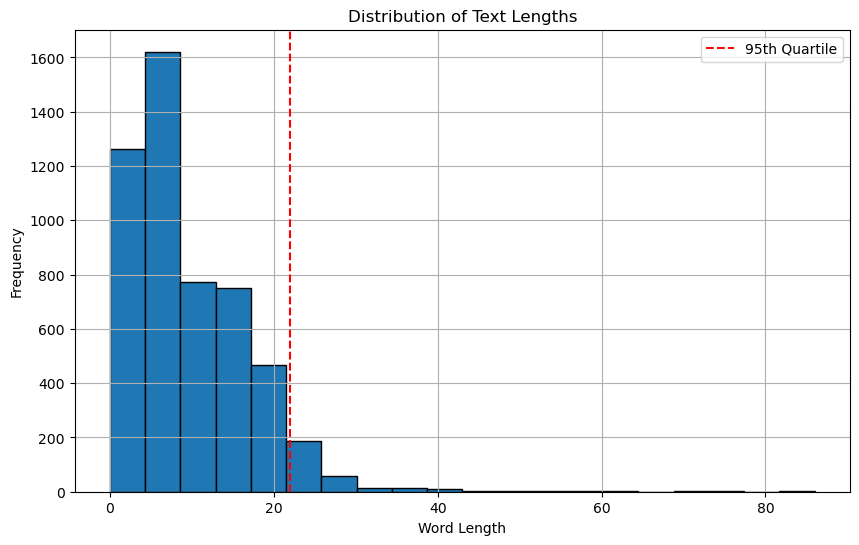

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Adding a vertical line for the 95th quartile
quartile_95 = np.percentile(text_lengths, 95)
plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.grid(True)
plt.show()

Descriptive statistics of the text lengths are displayed using the describe method of the DataFrame 'df.text_length'.

In [ ]:
df.text_length.describe()

count    5171.000000
mean        9.758267
std         7.041900
min         0.000000
25%         5.000000
50%         7.000000
75%        14.000000
max        86.000000
Name: text_length, dtype: float64

Visualize text with less than 10 words

A count plot is generated to visualize the distribution of texts with less than 10 words, filtering the data based on the 'text_length' column.

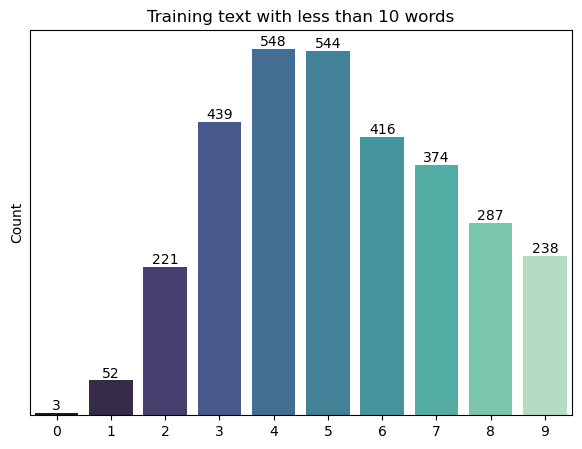

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_length', data=df[df['text_length']<10], palette='mako')
plt.title('Training text with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.xlabel('')
plt.show()


A subset of the DataFrame 'df' is created, including only the rows where the text length is less than 2.

In [ ]:
data_head=df[df['text_length']<2]
data_head.head(30)

,label,text,text1,text2,text3,text_length
43,ham,WHO ARE YOU SEEING?,who are you seeing,seeing,seeing,1
127,ham,Are you there in room.,are you there in room,room,room,1
252,ham,What you doing?how are you?,what you doinghow are you,doinghow,doinghow,1
260,ham,Yup,yup,yup,yup,1
275,ham,Thanx...,thanx,thanx,thanx,1
283,ham,Okie...,okie,okie,okie,1
286,ham,Ok..,ok,ok,ok,1
545,ham,Then any special there?,then any special there,special,special,1
595,ham,I am great! How are you?,i am great how are you,great,great,1
782,ham,Beerage?,beerage,beerage,beerage,1


**Remove rows**

As can be seen, rows below word length of 2 either are empty rows or don't carry too much insight. Therefore, rows with word length below 2 are dropped from the DataFrame 'df'.

In [ ]:
df = df[df['text_length'] >= 2]

Drop columns and shuffle

Columns 'text', 'text1', and 'text2' are dropped from the DataFrame 'df'.

In [ ]:
df = df.drop(['text', 'text1', 'text2'], axis=1)

The training dataframe 'df' is shuffled randomly to ensure a more balanced distribution of labels.

In [ ]:
# Shuffle training dataframe
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head()

,label,text3,text_length
547,ham,sorry took long omw now,5
5441,ham,way make sure u get train worc foregate street not shrub hill fun night x,15
5312,ham,got ur favorite oyster n got favorite sashimi ok lar dun say already wait ur stomach start rumbling,18
1394,ham,r still meeting 4 dinner tonight,6
4391,ham,new year plan,3


In [ ]:
df.label.value_counts()

ham     4463
spam     653
Name: label, dtype: int64

Recategorise Labels

Label encoding is applied to the 'label' column of the DataFrame 'df', converting categorical labels into numerical representations. A DataFrame 'dr' is then created to display the original labels and their corresponding encoded values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the encoder
le = LabelEncoder()

# Apply label encoding
df['label_le'] = le.fit_transform(df['label'])

# Define data
data = {
    'Label': le.classes_,
    'Label Encoded': le.transform(le.classes_)
}

# Create DataFrame
dr = pd.DataFrame(data)
dr

,Label,Label Encoded
0,ham,0
1,spam,1


The 'Label' column of the DataFrame 'dr' is converted into a list, 'class_names', for further use in classification tasks.

In [ ]:
class_names=dr.Label.tolist()
class_names

['ham', 'spam']

**Data Balancing**

The following code shows the process of oversampling the data using RandomOverSampler from the imbalanced-learn library. It resamples the data to balance the classes by generating synthetic samples from the minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['text3']).reshape(-1, 1), np.array(df['label_le']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text3', 'label_le']);

In [ ]:
train_os.head()

,text3,label_le
0,sorry took long omw now,0
1,way make sure u get train worc foregate street not shrub hill fun night x,0
2,got ur favorite oyster n got favorite sashimi ok lar dun say already wait ur stomach start rumbling,0
3,r still meeting 4 dinner tonight,0
4,new year plan,0


In [ ]:
train_os['label_le'].value_counts()

0    4463
1    4463
Name: label_le, dtype: int64

In [ ]:
# Shuffle training dataframe
train_os = train_os.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_os.head()

,text3,label_le
6170,today voda number ending 1225 selected receive 50award match please call 08712300220 quoting claim code 3100 standard rate app,1
5832,urgent trying contact u today draw show won 800 prize guaranteed call 09050001295 land line claim a21 valid 12hrs,1
286,yup bathe liao,0
8484,double min txts 4 6months free bluetooth orange available sony nokia motorola phone call mobileupd8 08000839402 call2optoutn9dx,1
5684,selected stay 1 250 top british hotel nothing holiday worth 350 claim call london 02072069400 bx 526 sw73ss,1


In [ ]:
X = train_os['text3'].to_numpy()
y = train_os['label_le'].to_numpy()

In [ ]:
X, y

(array(['today voda number ending 1225 selected receive 50award match please call 08712300220 quoting claim code 3100 standard rate app',
        'urgent trying contact u today draw show won 800 prize guaranteed call 09050001295 land line claim a21 valid 12hrs',
        'yup bathe liao', ...,
        'won valued vodafone customer computer picked win 150 prize collect easy just call 09061743386',
        'yup anything lor u dun wan ok',
        'show ur colour euro 2004 241 offer get england flag 3lions tone ur phone click following service message info'],
       dtype=object),
 array([1, 1, 0, ..., 1, 0, 1]))

The oversampled data is then split into training and validation sets using the train_val_split function, which takes the sentences and labels along with a training split ratio as input and returns the split sets.

In [ ]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets

    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set

    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """

    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return train_sentences, validation_sentences, train_labels, validation_labels

In [ ]:
# Test your function
X_train, X_valid, y_train, y_valid = train_val_split(X, y, 0.8)

print(f"There are {len(X_train)} sentences for training.\n")
print(f"There are {len(y_train)} labels for training.\n")
print(f"There are {len(X_valid)} sentences for validation.\n")
print(f"There are {len(y_valid)} labels for validation.")

There are 7140 sentences for training.

There are 7140 labels for training.

There are 1786 sentences for validation.

There are 1786 labels for validation.


In [ ]:
# Check the shape
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((7140,), (1786,), (7140,), (1786,))

In [ ]:
# Check the lengths
len(X_train), len(X_valid), len(y_train), len(y_valid)

(7140, 1786, 7140, 1786)

In [ ]:
X_train[:5], X_valid[:5]

(array(['today voda number ending 1225 selected receive 50award match please call 08712300220 quoting claim code 3100 standard rate app',
        'urgent trying contact u today draw show won 800 prize guaranteed call 09050001295 land line claim a21 valid 12hrs',
        'yup bathe liao',
        'double min txts 4 6months free bluetooth orange available sony nokia motorola phone call mobileupd8 08000839402 call2optoutn9dx',
        'selected stay 1 250 top british hotel nothing holiday worth 350 claim call london 02072069400 bx 526 sw73ss'],
       dtype=object),
 array(['updatenow 12mths half price orange line rental 400minscall mobileupd8 08000839402 call2optoutj5q',
        'dear will reach', 'like see xxx pic hot nearly banned uk',
        'hi ur lookin 4 saucy daytime fun wiv busty married woman free next week chat now 2 sort time 09099726429 janinexx calls1minmobsmorelkpobox177hp51fl',
        'im school now n ill da lab stuff give call r done'], dtype=object))

In [ ]:
y_train[:5], y_valid[:5]

(array([1, 1, 0, 1, 1]), array([1, 0, 1, 1, 0]))

The train and valid texts are copied to be used later.

In [ ]:
X_train_tx=X_train.copy()
X_valid_tx=X_valid.copy()

In [ ]:
X_train_tx[:5], X_valid_tx[:5]

(array(['today voda number ending 1225 selected receive 50award match please call 08712300220 quoting claim code 3100 standard rate app',
        'urgent trying contact u today draw show won 800 prize guaranteed call 09050001295 land line claim a21 valid 12hrs',
        'yup bathe liao',
        'double min txts 4 6months free bluetooth orange available sony nokia motorola phone call mobileupd8 08000839402 call2optoutn9dx',
        'selected stay 1 250 top british hotel nothing holiday worth 350 claim call london 02072069400 bx 526 sw73ss'],
       dtype=object),
 array(['updatenow 12mths half price orange line rental 400minscall mobileupd8 08000839402 call2optoutj5q',
        'dear will reach', 'like see xxx pic hot nearly banned uk',
        'hi ur lookin 4 saucy daytime fun wiv busty married woman free next week chat now 2 sort time 09099726429 janinexx calls1minmobsmorelkpobox177hp51fl',
        'im school now n ill da lab stuff give call r done'], dtype=object))

**Model 0: Baseline**

Next, a simple baseline model is defined using a TF-IDF vectorizer and a multinomial Naive Bayes classifier within a Scikit-Learn pipeline. The model is then trained on the training data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Now fit the model
model_0.fit(X_train_tx, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

The accuracy of the baseline model is then evaluated on the validation data and printed out.

In [ ]:
baseline_score = model_0.score(X_valid_tx, y_valid)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 98.04%


Now, predictions are made using the baseline model on the validation sentences.

In [ ]:
# Make predictions
baseline_preds = model_0.predict(X_valid_tx)
baseline_preds[:20]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

Then a function calculate_results is defined to calculate the accuracy, precision, recall, and F1 score of the model's predictions.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred, loss=None):
    """
    Calculates model accuracy, precision, recall, f1-score, and loss of a binary classification model.

    Args:
    -----
    y_true: true labels in the form of a 1D array
    y_pred: predicted labels in the form of a 1D array
    loss: (optional) loss value of the model, default is None

    Returns a dictionary of accuracy, precision, recall, f1-score, and loss.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall, and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1,
        "loss": loss
    }
    return model_results


The function is used to calculate the results of the baseline model and these are printed out.

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=y_valid,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 98.04031354983202,
 'precision': 0.9804771147326234,
 'recall': 0.9804031354983203,
 'f1': 0.9804029327585986,
 'loss': None}

A helper function compare_baseline_to_new_results is defined to compare the results of the baseline model to a new model. It does this by calculating the difference between the baseline and new results for each metric.

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    if key != 'loss': # Do not compare if the key is 'loss'
      print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

**Text Length in Training Data**

Next, the code analyzes the text length in the training data. It calculates the average number of tokens (words) in the training texts, finds the 98th percentile of text lengths, and plots a histogram to visualize the distribution of text lengths.

In [ ]:
# Find average number of tokens (words) in training texts
round(sum([len(i.split()) for i in X_train])/len(X_train))

13

In [ ]:
# Calculate the length of each text in X_train
text_lengths = [len(text.split()) for text in X_train]

# Find the 98th percentile
percentile_98 = np.percentile(text_lengths, 98)

print(f"98th Percentile of Text Lengths: {percentile_98}")

98th Percentile of Text Lengths: 26.0


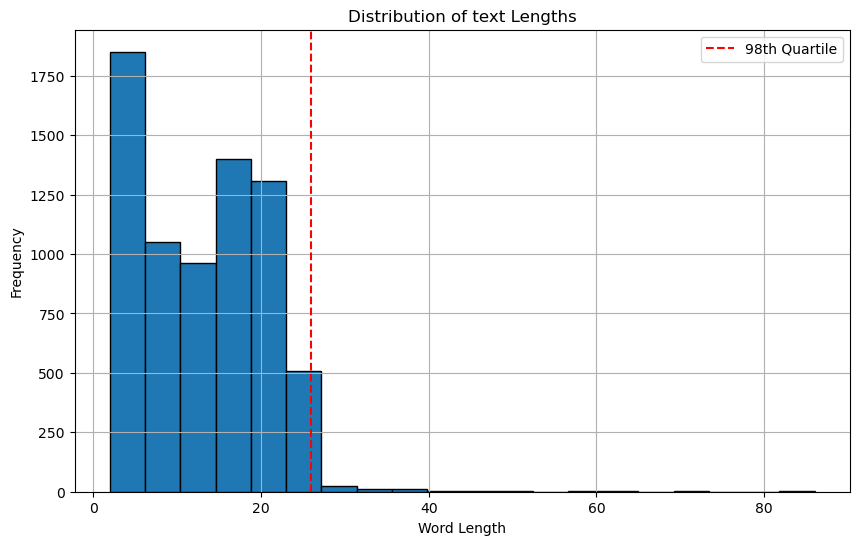

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 98th quartile
percentile_98 = np.percentile(text_lengths, 98)
plt.axvline(x=percentile_98, color='red', linestyle='--', label='98th Quartile')
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
max_text_length = max(text_lengths)
print(f"Maximum Text Length: {max_text_length}")

Maximum Text Length: 86


**Tokenizer & Sequence Padding**

The code then tokenizes the training and validation sentences using the fit_tokenizer function, which creates a tokenizer and fits it on the training sentences.

In [ ]:
# FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences

    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token

    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """

    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [ ]:
OOV_TOKEN = "<OOV>"

In [ ]:
NUM_WORDS = 7000

Next, this function is used to fit a tokenizer to the training sentences and the word index is extracted. A word index is a dictionary mapping words to their corresponding numerical identifier.

In [ ]:
# Test your function
tokenizer = fit_tokenizer(X_train, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 8063 words

<OOV> token included in vocabulary


In [ ]:
max_vocab_length=NUM_WORDS
# max_vocab_length=len(word_index)

In the following block of code, a function seq_and_pad is defined to convert sentences to sequences of integers (tokens) and pad these sequences so they are all the same length.

In [ ]:
# FUNCTION: seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length

    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence

    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """

    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)

    return padded_sequences

In [ ]:
PADDING = 'post'
max_length=int(percentile_98)

Then, this function is applied to the training and validation sentences to prepare them for input to a model. The shape of the resulting sequences is printed out for confirmation.

In [ ]:
# Test your function
X_train = seq_and_pad(X_train, tokenizer, PADDING, max_length)
X_valid = seq_and_pad(X_valid, tokenizer, PADDING, max_length)

print(f"Padded training sequences have shape: {X_train.shape}\n")
print(f"Padded validation sequences have shape: {X_valid.shape}")

Padded training sequences have shape: (7140, 26)

Padded validation sequences have shape: (1786, 26)


In [ ]:
X_train[:5], X_valid[:5]

(array([[  39,  633,   45,  394, 2526,  127,   83, 2527,  186,   36,    2,
          522,  634,   16,   95, 1642,  538,   84,  810,    0,    0,    0,
            0,    0,    0,    0],
        [  33,  122,   30,    3,   39,   65,   62,   28,  156,   18,   49,
            2, 2528,  168,   68,   16, 2529,  100,  159,    0,    0,    0,
            0,    0,    0,    0],
        [ 523, 1643,  611,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [ 229,   43,  236,   10, 1184,    6,  466,   97,  702,  425,   38,
          320,   29,    2,  269,  276, 1248,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [ 127,  476,   64,  157,  244, 1460,  656,  365,  111,  488,  245,
           16,    2, 1030, 3249, 3250, 3251, 1461,    0,    0,    0,    0,
            0,    0,    0,    0]], dtype=int32),
 array([[1477, 2162,  240,  232,   97,   68,  355, 2541,  269,  2

In [ ]:
y_train[:10], y_valid[:10]

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1]), array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1]))

**Callbacks**

Callbacks are defined, including a ModelCheckpoint callback, to save the best model during training based on the validation loss.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_checkpoint_callback(checkpoint_path):
    """
    This function returns a ModelCheckpoint callback that saves the model's weights only when the
    validation accuracy improves.

    Parameters:
    checkpoint_path (str): The filepath where the model weights should be saved.

    Returns:
    ModelCheckpoint callback
    """
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                          monitor='val_loss',
                                          mode='min',
                                          save_best_only=True,
                                          verbose=1)
    return checkpoint_callback

Embedding layer

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

In [ ]:
max_length

26

In [ ]:
max_vocab_length

7000

Here an embedding layer is set up, converting input words into dense vectors of fixed size. This representation captures semantic relationships between words. tf.random.set_seed(42) ensures reproducibility by fixing the randomness.

In [ ]:
# from tensorflow.keras import layers

tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=300, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

**Model: Simple Dense**

In [ ]:
X_train.shape[1]

26

This code block builds our first neural network model for text classification. The GlobalAveragePooling1D layer is used to reduce the dimensionality of the input, which helps model performance by condensing information.

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")
x = embedding(inputs)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_dense = tf.keras.Model(inputs, outputs, name="model_dense")

The code compiles the model_dense using binary_crossentropy as the loss function, Adam as the optimizer, and accuracy as the evaluation metric. This configuration sets up the model for binary classification tasks, optimizing it with the Adam optimizer and assessing its performance based on the accuracy of its predictions.

In [ ]:
# Compile model
model_dense.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_dense.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 26, 300)           2100000   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 1)                 301       
                                                                 
Total params: 2,100,301
Trainable params: 2,100,301
Non-trainable params: 0
_________________________________________________________________


Now, we create an instance of the ModelCheckpoint callback.

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_dense"

cc = create_checkpoint_callback(checkpoint_path)

The model_dense is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in model_dense_history, and the defined callbacks (cc) are utilized during training.

In [ ]:
# Fit the model
model_dense_history = model_dense.fit(X_train,
                              y_train,
                              epochs=20,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.3655 - accuracy: 0.8725
Epoch 1: val_loss improved from inf to 0.13736, saving model to best_model_dense
224/224 [==============================] - 21s 89ms/step - loss: 0.3655 - accuracy: 0.8725 - val_loss: 0.1374 - val_accuracy: 0.9597
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0954 - accuracy: 0.9746
Epoch 2: val_loss improved from 0.13736 to 0.06479, saving model to best_model_dense
224/224 [==============================] - 5s 23ms/step - loss: 0.0954 - accuracy: 0.9746 - val_loss: 0.0648 - val_accuracy: 0.9731
Epoch 3/20
220/224 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9871
Epoch 3: val_loss improved from 0.06479 to 0.03556, saving model to best_model_dense
224/224 [==============================] - 3s 15ms/step - loss: 0.0464 - accuracy: 0.9873 - val_loss: 0.0356 - val_accuracy: 0.9944
Epoch 4/20
224/224 [==============================] - ETA: 0s - 

After training, the history of model accuracy and loss is plotted over epochs.

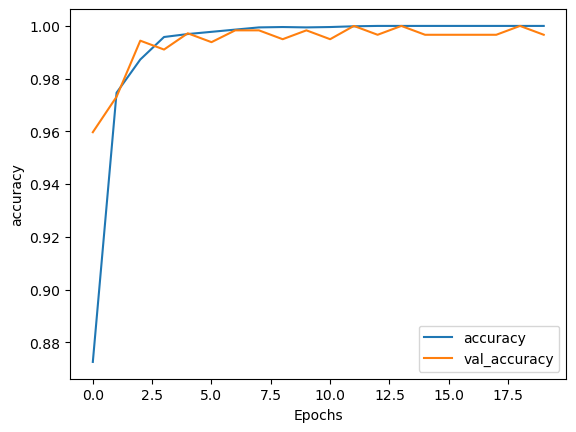

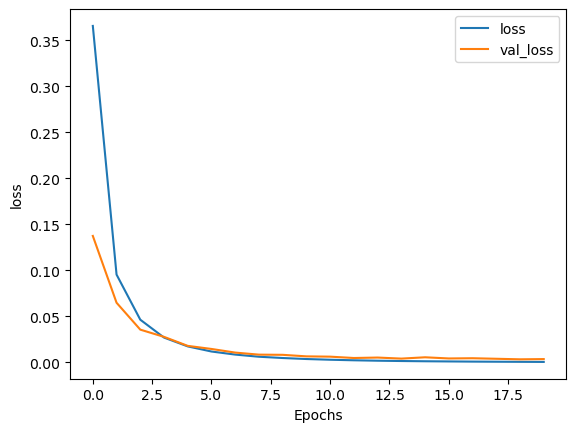

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_dense_history, 'accuracy')
plot_graphs(model_dense_history, 'loss')

The best model (as determined by validation loss) is loaded.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_dense = load_model(checkpoint_path)

The model is evaluated on the validation set.

In [ ]:
# Check the results
model_dense_ev = model_dense.evaluate(X_valid, y_valid)
model_dense_loss = model_dense_ev[0]
model_dense_loss

56/56 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000


0.003320741467177868

Probabilities are predicted on the validation set and then converted into class predictions.

In [ ]:
# Make predictions (these come back in the form of probabilities)
model_dense_pred_probs = model_dense.predict(X_valid)
model_dense_pred_probs[:10] # only print out the first 10 prediction probabilities

56/56 [==============================] - 0s 2ms/step


array([[9.9972624e-01],
       [6.7784829e-04],
       [9.9658990e-01],
       [9.9994218e-01],
       [4.7086946e-06],
       [1.0000000e+00],
       [6.1911533e-06],
       [3.0945193e-06],
       [4.9586097e-06],
       [9.9998391e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_dense_preds = tf.squeeze(tf.round(model_dense_pred_probs))
model_dense_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Various metrics like accuracy, precision, recall, and F1-score are calculated for model performance evaluation.

In [ ]:
# Calculate model_dense metrics
model_dense_results = calculate_results(y_true=y_valid,
                                    y_pred=model_dense_preds,
                                       loss=model_dense_loss)
model_dense_results

{'accuracy': 100.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'loss': 0.003320741467177868}

In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_dense.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 0s 2ms/step


A confusion matrix is generated to visualize the performance of the classification model. The matrix is then made more readable through a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[897,   0],
       [  0, 889]])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

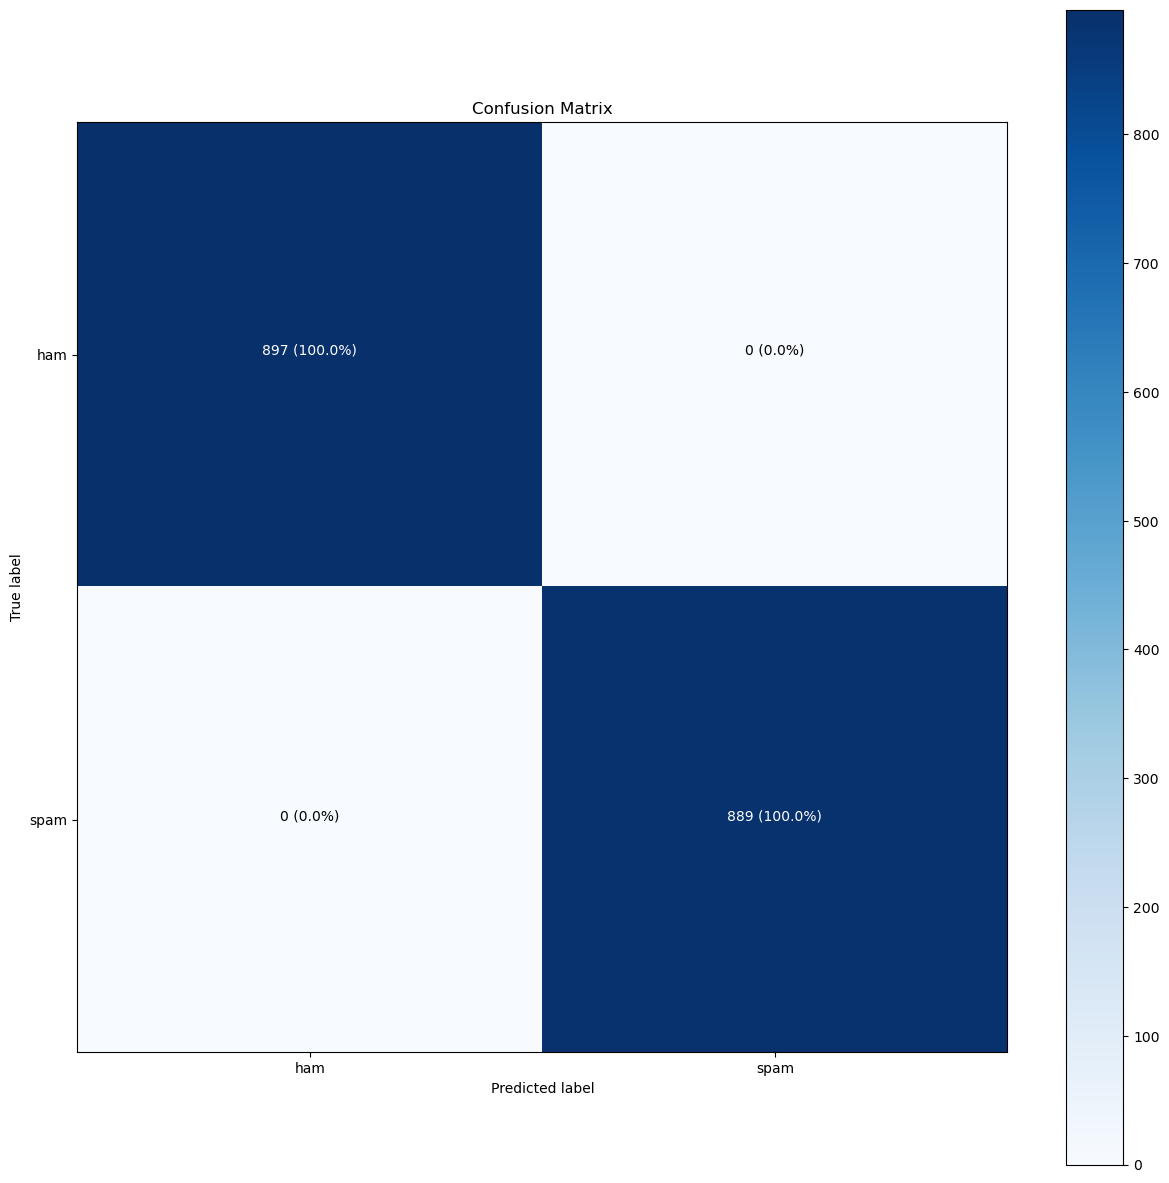

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The following show_random_predictions function picks random samples from the validation set, makes predictions on them, and prints the actual and predicted labels. It provides an intuitive way to see how the model performs on unseen data.

In [ ]:
index_word = {v: k for k, v in tokenizer.word_index.items()}

from colorama import Fore, Style
def show_random_predictions(model, X_valid, y_valid, tokenizer, num_samples=5, class_names=None):
    # Check if it's binary or multi-class classification
    is_binary_classification = len(np.unique(y_valid)) == 2

    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(X_valid)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = X_valid[random_indices]
    random_y_samples = y_valid[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)

    if is_binary_classification:
        y_pred = np.squeeze(np.round(y_pred_probs).astype(int))
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text_tokens = random_X_samples[i]
        text = ' '.join([index_word.get(token) for token in text_tokens if token != 0])  # 0 is typically the padding token
        true_label = random_y_samples[i] if is_binary_classification else np.argmax(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)

The show_random_predictions function is called to generate and display predictions on random samples.

In [ ]:
show_random_predictions(model_dense,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 32ms/step

Sample 1:
Text: much gave morning
True: ham 
 Predicted: ham

Sample 2:
Text: congrats 1 year special cinema pas 2 call 09061209465 now c suprman v matrix3 starwars3 etc 4 free bx420ip45we 150pm dont miss
True: spam 
 Predicted: spam

Sample 3:
Text: wow didnt think common take back ur not freak unless u <OOV> off
True: ham 
 Predicted: ham

Sample 4:
Text: win 1000 cash prize prize worth 5000
True: spam 
 Predicted: spam

Sample 5:
Text: yo dude guess just got arrested day
True: ham 
 Predicted: ham

Sample 6:
Text: good <OOV> love today hope good maybe interview wake miss babe passionate kiss across sea
True: ham 
 Predicted: ham

Sample 7:
Text: free 1st week no1 nokia tone 4 ur mobile every week just txt nokia 8077 get txting tell ur mate wwwgetzedcouk pobox 36504 w45wq 16 norm150ptone
True: spam 
 Predicted: spam

Sample 8:
Text: thats cool gentleman will treat dignity respect
True: ham 
 Predicted: ham

Sample 9:
Text: get 3 li

**Model: LSTM**

We create an LSTM (Long Short-Term Memory) model for sequence classification. The model starts by setting a random seed for reproducibility. It includes an Embedding layer that converts input words into dense fixed-size vectors. The model consists of two consecutive LSTM layers, with the first returning sequences and enabling layer stacking. A dense layer with a 'relu' activation function is added, followed by an output dense layer with a sigmoid activation function. The model is named "model_1LSTM" and takes inputs and produces outputs according to the defined layers.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1LSTM_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=300,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")
x = model_1LSTM_embedding(inputs)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1LSTM = tf.keras.Model(inputs, outputs, name="model_1LSTM")

The code compiles the LSTM model using binary_crossentropy as the loss function, Adam as the optimizer, and accuracy as the evaluation metric. This configuration sets up the model for binary classification tasks, optimizing it with the Adam optimizer and assessing its performance based on the accuracy of its predictions.

In [ ]:
# Compile model
model_1LSTM.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1LSTM.summary()

Model: "model_1LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 26, 300)           2100000   
                                                                 
 lstm_4 (LSTM)               (None, 26, 64)            93440     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,230,689
Trainable params: 2,230,689
Non

We now create a checkpoint callback for model LSTM.

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_LSTM"

cc = create_checkpoint_callback(checkpoint_path)


The LSTM model is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in model_1LSTM_history, and the defined callbacks (cc) are utilized during training.

In [ ]:
# Fit model
model_1LSTM_history = model_1LSTM.fit(X_train, y_train,
                              epochs=20,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.1201 - accuracy: 0.9479
Epoch 1: val_loss improved from inf to 0.01921, saving model to best_model_LSTM
224/224 [==============================] - 32s 123ms/step - loss: 0.1201 - accuracy: 0.9479 - val_loss: 0.0192 - val_accuracy: 0.9933
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9980
Epoch 2: val_loss improved from 0.01921 to 0.00483, saving model to best_model_LSTM
224/224 [==============================] - 12s 55ms/step - loss: 0.0047 - accuracy: 0.9980 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 3/20
220/224 [============================>.] - ETA: 0s - loss: 2.8709e-04 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.00483
224/224 [==============================] - 4s 17ms/step - loss: 2.8402e-04 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9955
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 4.9941e-05 - accuracy: 1

Following training, the history of LSTM model's accuracy and loss over the epochs is plotted.

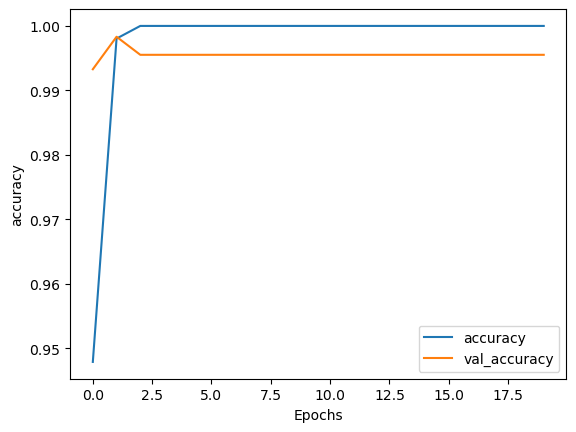

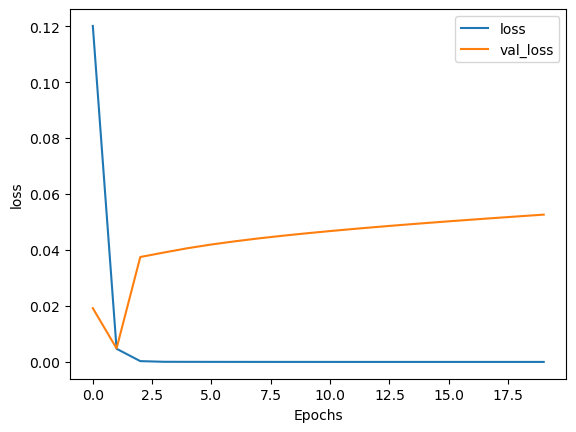

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_1LSTM_history, 'accuracy')
plot_graphs(model_1LSTM_history, 'loss')

The best LSTM model (as determined by validation loss) is loaded for further analysis.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_1LSTM = load_model(checkpoint_path)

The LSTM model is evaluated on the validation set to understand its performance on unseen data.

In [ ]:
# Check the results
model_1LSTM_ev  = model_1LSTM.evaluate(X_valid, y_valid)
model_1LSTM_loss = model_1LSTM_ev [0]
model_1LSTM_loss

56/56 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9983


0.004826356656849384

The LSTM model predicts probabilities on the validation set, which are then converted into class predictions.

In [ ]:
# Make predictions on the validation dataset
model_1LSTM_pred_probs = model_1LSTM.predict(X_valid)
model_1LSTM_pred_probs.shape, model_1LSTM_pred_probs[:10] # view the first 10

56/56 [==============================] - 1s 3ms/step


((1786, 1),
 array([[9.9992168e-01],
        [1.9697398e-04],
        [9.9992192e-01],
        [9.9991214e-01],
        [2.0251739e-04],
        [9.9991715e-01],
        [2.2766051e-04],
        [1.9965145e-04],
        [1.9294438e-04],
        [9.9992037e-01]], dtype=float32))

In [ ]:
# Convert prediction probabilities to labels
model_1LSTM_preds = tf.squeeze(tf.round(model_1LSTM_pred_probs))
model_1LSTM_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Metrics such as accuracy, precision, recall, and F1-score are calculated to evaluate the performance of the LSTM model.

In [ ]:
# Calculate LSTM model results
model_1LSTM_results = calculate_results(y_true=y_valid,
                                    y_pred=model_1LSTM_preds,
                                       loss=model_1LSTM_loss)
model_1LSTM_results

{'accuracy': 99.83202687569988,
 'precision': 0.9983259180773228,
 'recall': 0.9983202687569989,
 'f1': 0.9983202766559887,
 'loss': 0.004826356656849384}

The function compares the performance metrics of the baseline model with the LSTM model. The comparison include various metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_1LSTM_results)

Baseline accuracy: 98.04, New accuracy: 99.83, Difference: 1.79
Baseline precision: 0.98, New precision: 1.00, Difference: 0.02
Baseline recall: 0.98, New recall: 1.00, Difference: 0.02
Baseline f1: 0.98, New f1: 1.00, Difference: 0.02


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_1LSTM.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 0s 4ms/step


A confusion matrix is generated to visualize the classification performance of the LSTM model. A custom function is used to make the matrix more readable.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[894,   3],
       [  0, 889]])

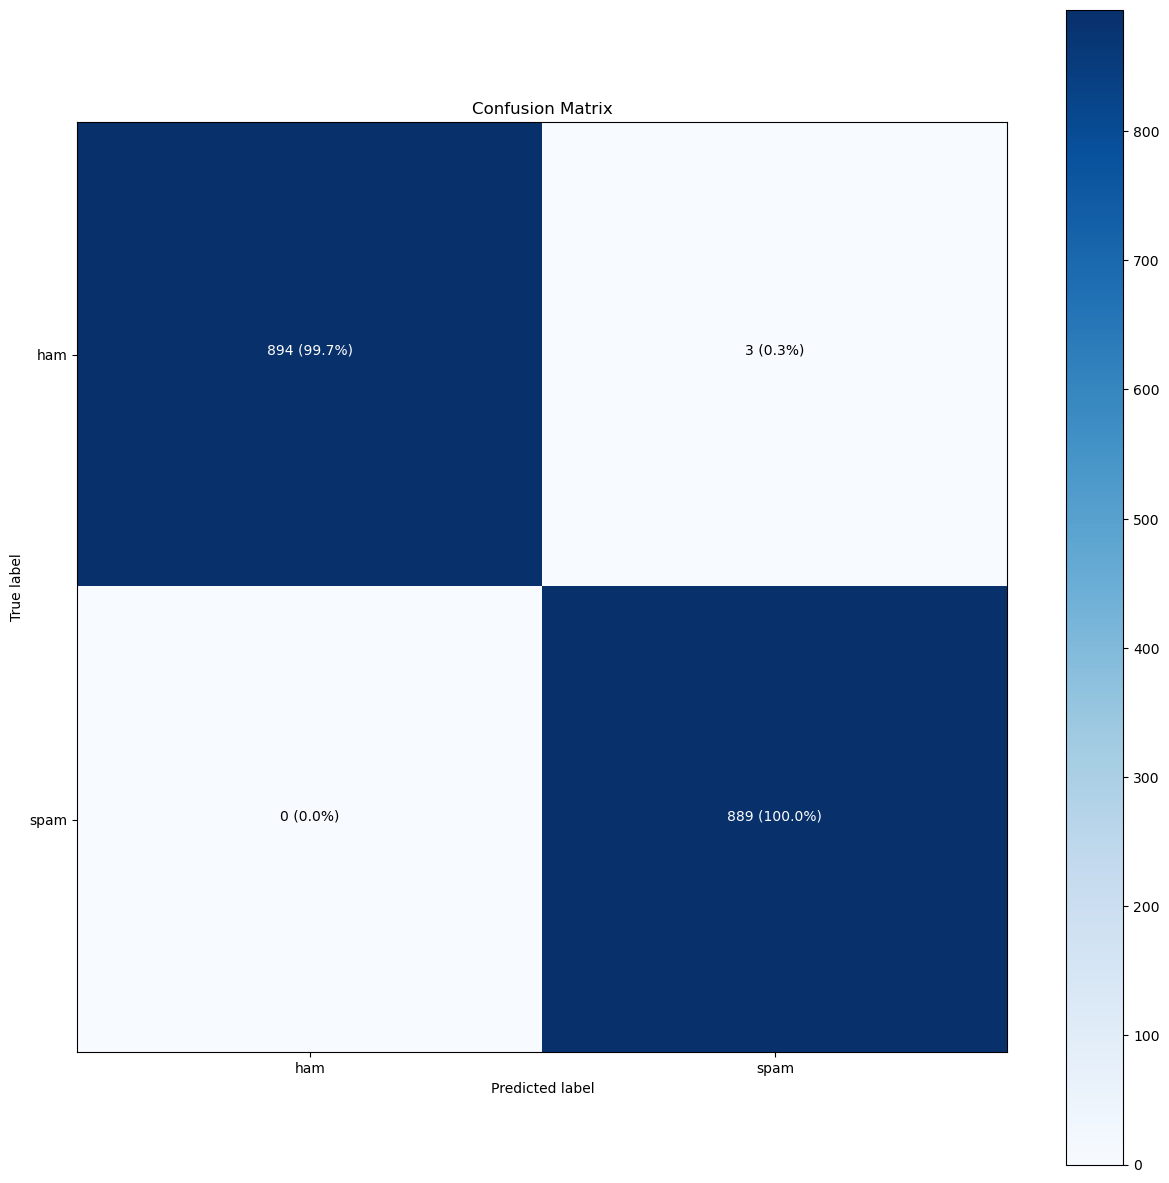

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The show_random_predictions function is called to generate and display predictions of the LSTM model on random samples.

In [ ]:
show_random_predictions(model_1LSTM,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 20ms/step

Sample 1:
Text: account credited 500 free text message activate just txt word credit no 80488 tc www80488biz
True: spam 
 Predicted: spam

Sample 2:
Text: december mobile 11mths entitled update latest colour camera mobile free call mobile update co free 08002986906
True: spam 
 Predicted: spam

Sample 3:
Text: message important information o2 user today lucky day 2 find log onto fantastic surprise awaiting
True: spam 
 Predicted: spam

Sample 4:
Text: whats <OOV> <OOV> something guy dont know
True: ham 
 Predicted: ham

Sample 5:
Text: <OOV> know
True: ham 
 Predicted: ham

Sample 6:
Text: k sure <OOV> home sm de pls
True: ham 
 Predicted: ham

Sample 7:
Text: really dun <OOV> leh u sleep early nite
True: ham 
 Predicted: ham

Sample 8:
Text: cmon babe make horny turn txt fantasy now babe im hot sticky need now reply cost 150 2 cancel send stop
True: spam 
 Predicted: spam

Sample 9:
Text: ur balance now 500 ur next question sang upt

**Model: Bidirectional LSTM**

We are now introducing the bidirectional LSTM (Long Short-Term Memory) model, which is a more sophisticated version of a recurrent neural network (RNN) model. This model is highly suitable for text classification tasks.

The model's reproducibility is ensured by setting a random seed. The model_lstm accepts word indices as its input and converts these into dense vectors via an embedding layer. This layer has a uniform embedding initializer and an output dimension of 128. It is followed by two bidirectional LSTM layers, each with 64 units. These layers are designed to capture context from both past and future data.

Next is a dense layer, which includes 512 units and uses a 'relu' activation function. The model concludes with an output layer that applies a sigmoid activation function for binary classification.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Parameters
embedding_dim=128

tf.random.set_seed(42)

# Input layer
inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")
# Create an embedding of the numerized numbers
x = layers.Embedding(input_dim=max_vocab_length,
                     output_dim=128,
                     embeddings_initializer="uniform",
                     input_length=max_length,
                     name="embedding_2")(inputs)

# Bidirectional LSTM
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# Another LSTM Layer
x = layers.Bidirectional(layers.LSTM(64))(x)
# Dense layer
x = layers.Dense(512, activation='relu')(x)
# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)
# Create the model
model_lstm = tf.keras.Model(inputs, outputs)


After these layers are assembled, the model, referred to as 'model_lstm', is compiled using the Adam optimizer and a binary cross-entropy loss function - appropriate for binary classification tasks.

In [ ]:
# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Print the model summary
model_lstm.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 26, 128)           896000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 26, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 512)               66048     
                                                                 
 dense_18 (Dense)            (None, 1)                 513 

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_Bi-LSTM"

cc = create_checkpoint_callback(checkpoint_path)

The model_lstm is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in history_lstm, and the defined callbacks (cc) are utilized during training.

In [ ]:
NUM_EPOCHS = 20

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_valid, y_valid),callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9529
Epoch 1: val_loss improved from inf to 0.01283, saving model to best_model_Bi-LSTM
224/224 [==============================] - 52s 197ms/step - loss: 0.1138 - accuracy: 0.9529 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 2: val_loss did not improve from 0.01283
224/224 [==============================] - 6s 27ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0274 - val_accuracy: 0.9955
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9987
Epoch 3: val_loss did not improve from 0.01283
224/224 [==============================] - 5s 22ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0136 - val_accuracy: 0.9955
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 8.3751e-05 - accuracy: 1.0000
Epoch 4: val_loss did not improve fro

Post-training, the model's accuracy and loss evolution across epochs is visualized.

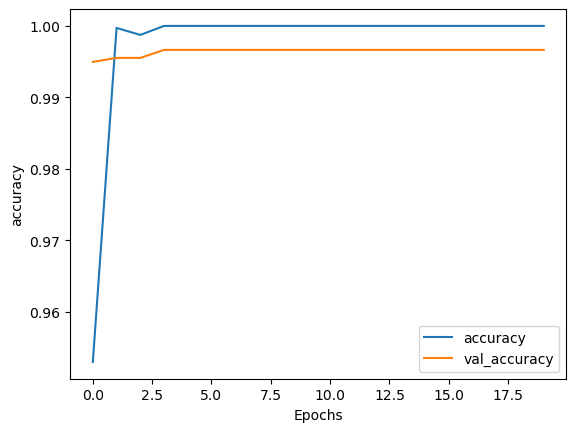

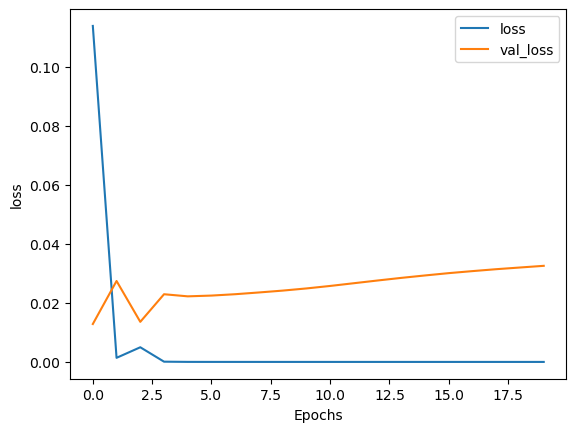

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

The model with the best validation loss is loaded for further usage.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_lstm = load_model(checkpoint_path)

Performance of this model is assessed on the validation dataset.

In [ ]:
# Check the results
model_lstm_ev = model_lstm.evaluate(X_valid, y_valid)
model_lstm_loss = model_lstm_ev[0]
model_lstm_loss

56/56 [==============================] - 2s 6ms/step - loss: 0.0128 - accuracy: 0.9950


0.012833485379815102

Class predictions are generated by transforming predicted probabilities on the validation dataset.

In [ ]:
# Make predictions with model
model_lstm_pred_probs = model_lstm.predict(X_valid)
model_lstm_pred_probs[:10]

56/56 [==============================] - 2s 6ms/step


array([[9.9997544e-01],
       [1.6921010e-03],
       [9.9909616e-01],
       [9.9998164e-01],
       [5.4247136e-04],
       [9.9999368e-01],
       [1.5493857e-03],
       [6.4024189e-04],
       [3.7889736e-04],
       [9.9999142e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_lstm_preds = tf.squeeze(tf.round(model_lstm_pred_probs))
model_lstm_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

To evaluate the model's performance, metrics such as accuracy, precision, recall, and F1-score are computed.

In [ ]:
# Calculate model performance metrics
model_lstm_results = calculate_results(y_valid, model_lstm_preds, loss=model_lstm_loss)
model_lstm_results

{'accuracy': 99.49608062709966,
 'precision': 0.9949663169017111,
 'recall': 0.9949608062709966,
 'f1': 0.9949607541360947,
 'loss': 0.012833485379815102}

Performance metrics of the baseline model and the bidirectional LSTM model are compared.

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_1LSTM_results)


Baseline accuracy: 98.04, New accuracy: 99.83, Difference: 1.79
Baseline precision: 0.98, New precision: 1.00, Difference: 0.02
Baseline recall: 0.98, New recall: 1.00, Difference: 0.02
Baseline f1: 0.98, New f1: 1.00, Difference: 0.02


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_lstm.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list


56/56 [==============================] - 0s 5ms/step


A confusion matrix is constructed to offer a visual perspective of the classification model's performance. The matrix is simplified using a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)


array([[894,   3],
       [  6, 883]])

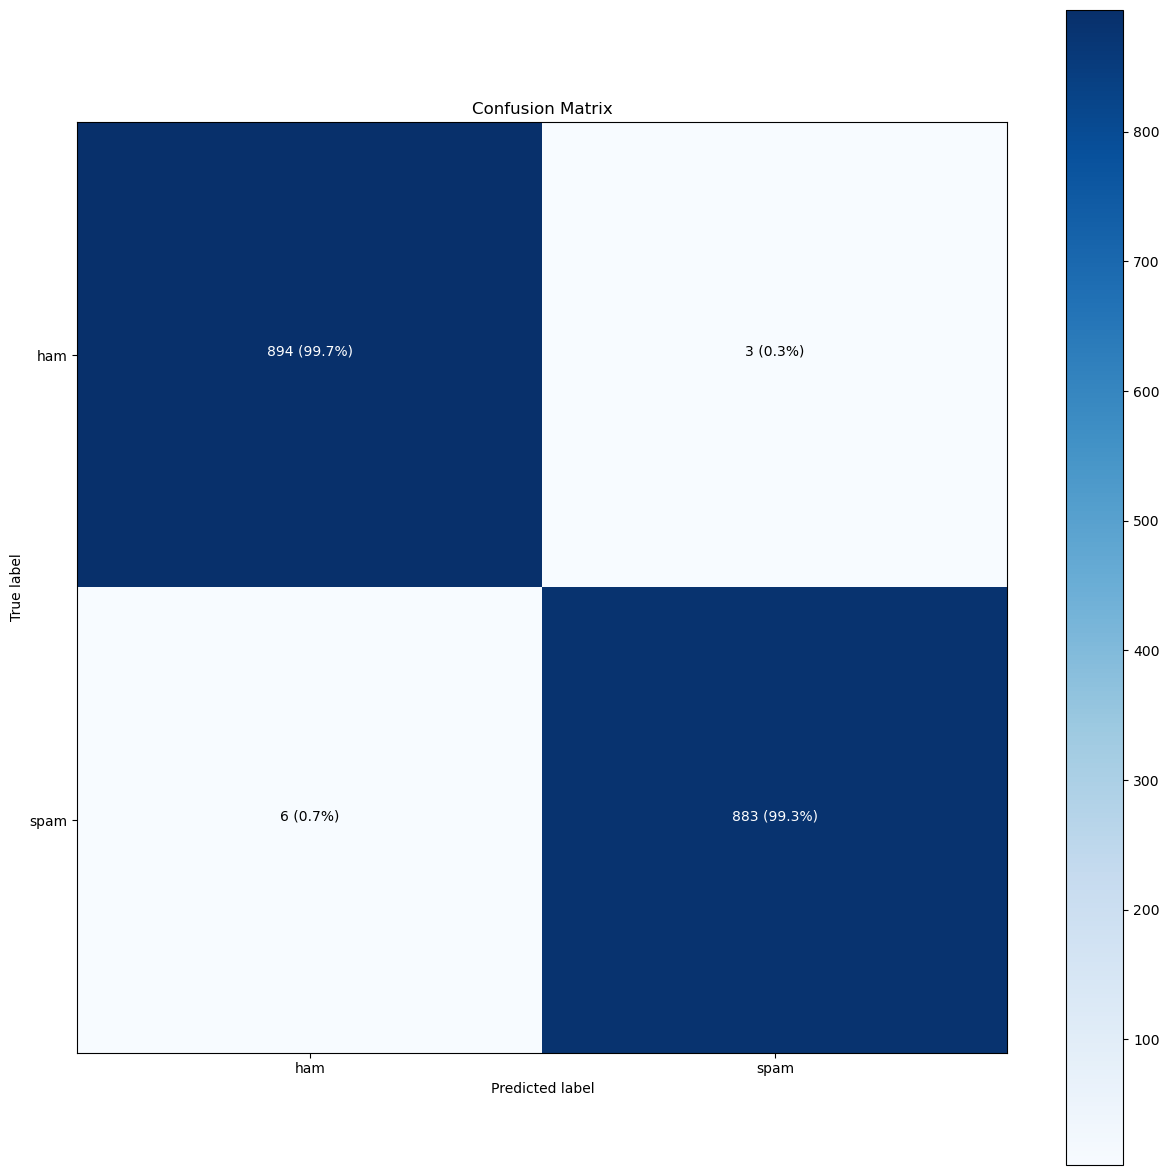

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The function 'show_random_predictions' is invoked to generate and display predictions on random samples.

In [ ]:
show_random_predictions(model_lstm,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 24ms/step

Sample 1:
Text: ur balance now 500 ur next question sang uptown girl 80 2 answer txt ur answer 83600 good luck
True: spam 
 Predicted: spam

Sample 2:
Text: congratulation u can claim 2 vip row ticket 2 c blu concert november blu gift guaranteed call 09061104276 claim tscs wwwsmsconet cost375max
True: spam 
 Predicted: spam

Sample 3:
Text: tot u reach liao said <OOV>
True: ham 
 Predicted: ham

Sample 4:
Text: u wan 2 come dinner tonight not
True: ham 
 Predicted: ham

Sample 5:
Text: show wot say u not c 4 <OOV>
True: ham 
 Predicted: ham

Sample 6:
Text: free camera phone linerental 449month 750 cross ntwk min 12 price txt bundle deal also avble call 08001950382 call2optoutj mf
True: spam 
 Predicted: spam

Sample 7:
Text: dear know ltgt th ltgt th birthday loving <OOV> planning give small gift day like <OOV> welcome please contact admin team detail
True: ham 
 Predicted: ham

Sample 8:
Text: ok cool see ya
True: ham 
 Predicted: 

**Model: GRU**

This code initializes a recurrent neural network (RNN) with Gated Recurrent Units (GRUs) for efficient sequence processing. It sets a random seed, uses an Embedding layer for dense vector transformations, and constructs the model with two GRUs and a Dense layer. The model, 'model_GRU', ends with an output layer with a sigmoid function, ideal for binary text classification tasks.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)

from tensorflow.keras import layers
model_GRU_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=300,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_GRU")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")
x = model_GRU_embedding(inputs)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_GRU = tf.keras.Model(inputs, outputs, name="model_GRU")

The 'model_GRU' is compiled using the Adam optimizer and binary cross-entropy as the loss function, suitable for binary classification tasks.

In [ ]:
# Compile GRU model
model_GRU.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_GRU.summary()

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 26)]              0         
                                                                 
 embedding_GRU (Embedding)   (None, 26, 300)           2100000   
                                                                 
 gru_4 (GRU)                 (None, 26, 64)            70272     
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,199,457
Trainable params: 2,199,457
Non-t

A checkpoint callback is created for the GRU model.

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_GRU"

cc = create_checkpoint_callback(checkpoint_path)

The improved  is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in model_GRU_history, and the defined callbacks (cc) are utilized during training.

In [ ]:
# Fit model
model_GRU_history = model_GRU.fit(X_train, y_train,
                              epochs=20,
                              validation_data=(X_valid, y_valid),
                              callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.1414 - accuracy: 0.9303
Epoch 1: val_loss improved from inf to 0.02039, saving model to best_model_GRU
224/224 [==============================] - 31s 121ms/step - loss: 0.1414 - accuracy: 0.9303 - val_loss: 0.0204 - val_accuracy: 0.9927
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 2: val_loss did not improve from 0.02039
224/224 [==============================] - 5s 22ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0232 - val_accuracy: 0.9966
Epoch 3/20
220/224 [============================>.] - ETA: 0s - loss: 3.6709e-05 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.02039
224/224 [==============================] - 4s 18ms/step - loss: 3.6564e-05 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9966
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 2.0381e-05 - accuracy: 1.0000
Epoch 4: val_loss did not improve

The model's accuracy and loss history is visualized post-training.

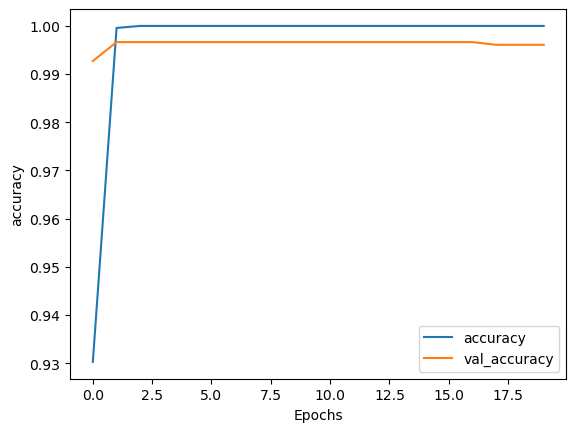

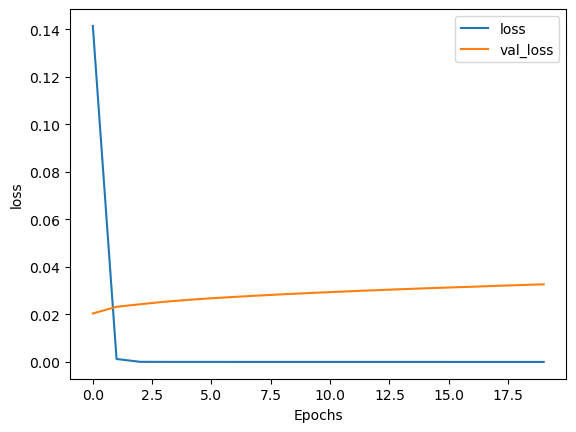

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_GRU_history, 'accuracy')
plot_graphs(model_GRU_history, 'loss')

The best model, determined by validation loss, is then loaded.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_GRU = load_model(checkpoint_path)

Model evaluation occurs on the validation set.

In [ ]:
# Check the results
model_GRU_ev = model_GRU.evaluate(X_valid, y_valid)
model_GRU_loss = model_GRU_ev[0]
model_GRU_loss

56/56 [==============================] - 1s 4ms/step - loss: 0.0204 - accuracy: 0.9927


0.020385857671499252

The model predicts probabilities on the validation set, converting these into class predictions.

In [ ]:
# Make predictions on the validation data
model_GRU_pred_probs = model_GRU.predict(X_valid)
model_GRU_pred_probs.shape, model_GRU_pred_probs[:10]

56/56 [==============================] - 1s 3ms/step


((1786, 1),
 array([[0.9996026 ],
        [0.00563962],
        [0.9811539 ],
        [0.9994717 ],
        [0.00561466],
        [0.99995923],
        [0.00605593],
        [0.00526471],
        [0.00445809],
        [0.9999379 ]], dtype=float32))

In [ ]:
# Convert prediction probabilities to labels
model_GRU_preds = tf.squeeze(tf.round(model_GRU_pred_probs))
model_GRU_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Performance metrics, including accuracy, precision, recall, and F1-score, are computed for model evaluation.

In [ ]:
# Calcuate model_GRU results
model_GRU_results = calculate_results(y_true=y_valid,
                                    y_pred=model_GRU_preds,
                                     loss=model_GRU_loss)
model_GRU_results

{'accuracy': 99.27211646136618,
 'precision': 0.9928251479763238,
 'recall': 0.9927211646136618,
 'f1': 0.9927205415654089,
 'loss': 0.020385857671499252}

The baseline model's performance is compared with the GRU model.

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_GRU_results)

Baseline accuracy: 98.04, New accuracy: 99.27, Difference: 1.23
Baseline precision: 0.98, New precision: 0.99, Difference: 0.01
Baseline recall: 0.98, New recall: 0.99, Difference: 0.01
Baseline f1: 0.98, New f1: 0.99, Difference: 0.01


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_GRU.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list


56/56 [==============================] - 0s 3ms/step


A confusion matrix is created for visualization of the model's classification performance. The matrix readability is enhanced via a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[897,   0],
       [ 13, 876]])

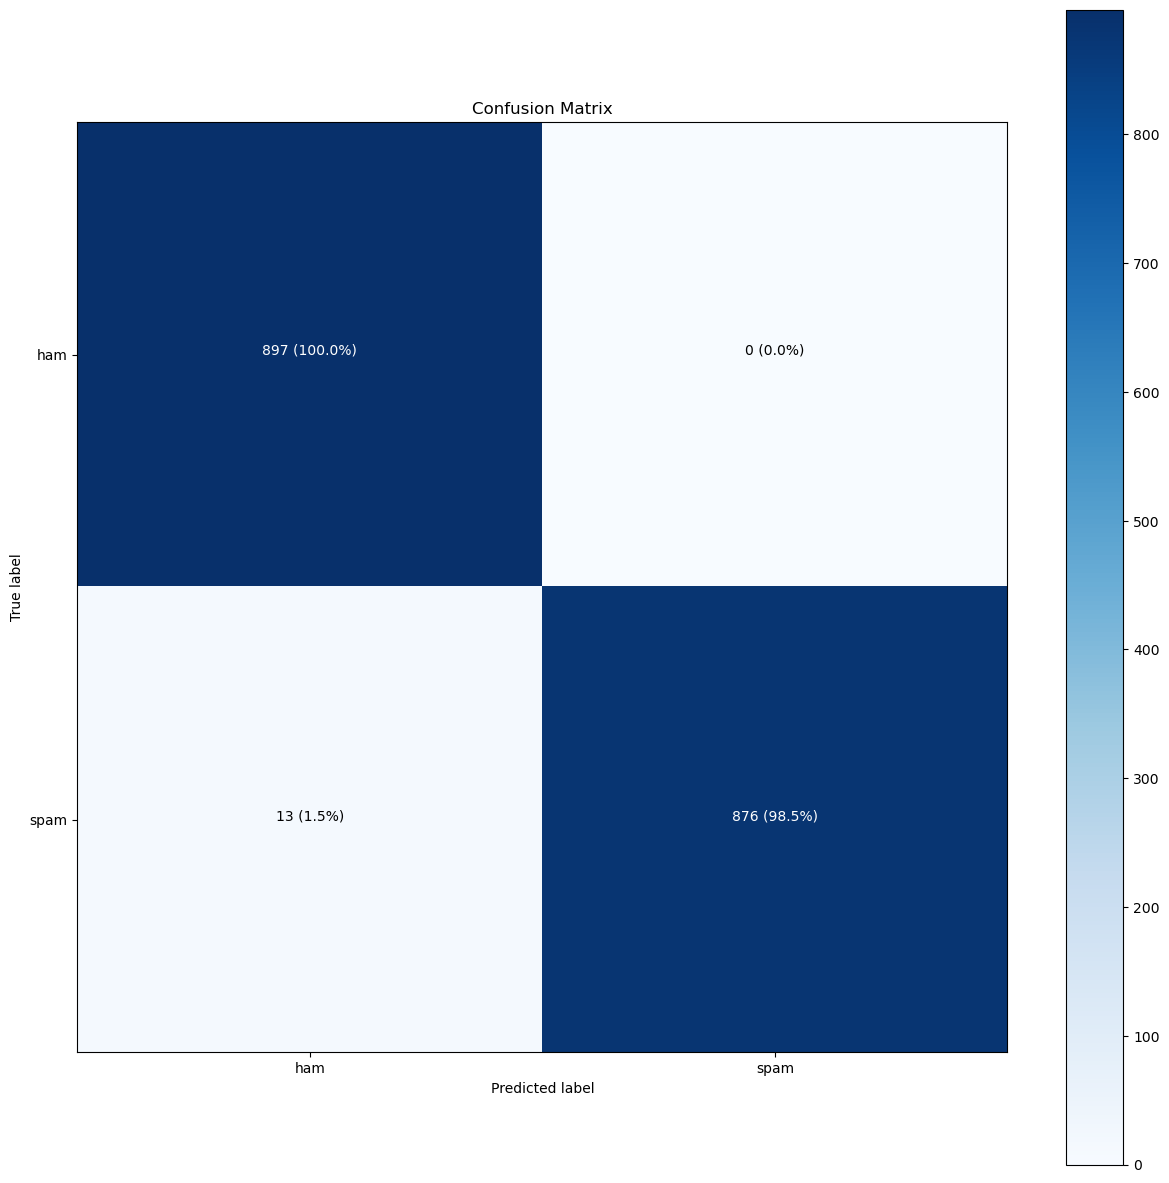

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Lastly, the 'show_random_predictions' function generates and displays predictions on random samples.

In [ ]:
show_random_predictions(model_GRU,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 19ms/step

Sample 1:
Text: club sub now expired 2 resub reply monoc 4 mono polyc 4 polys 1 weekly 150p per week txt stop 2 stop msg free stream 0871212025016
True: spam 
 Predicted: spam

Sample 2:
Text: reply win 100 weekly professional sport tiger wood play send stop 87239 end service
True: spam 
 Predicted: spam

Sample 3:
Text: doc <OOV> morphine cause pain med arent enough waiting mom bring med kick fast im gon na try later
True: ham 
 Predicted: ham

Sample 4:
Text: machan go gym tomorrow wil come late goodnight
True: ham 
 Predicted: ham

Sample 5:
Text: ur balance now 500 ur next question sang uptown girl 80 2 answer txt ur answer 83600 good luck
True: spam 
 Predicted: spam

Sample 6:
Text: today voda number ending 7548 selected receive 350 award match please call 08712300220 quoting claim code 4041 standard rate app
True: spam 
 Predicted: spam

Sample 7:
Text: refused loan secured unsecured cant get credit call free now 0800 195 6669

**Model: Bi-directional GRU**

The following code forms a bidirectional recurrent neural network (RNN) using Gated Recurrent Units (GRUs). After setting a random seed for consistency, an Embedding layer transforms inputs into dense vectors. Two bidirectional GRU layers allow past and future context capture. The model, 'model_bi_GRU', includes a Dense layer and concludes with a sigmoid-function output layer, apt for binary classification tasks.

In [ ]:
# Set random seed and create embedding layer
tf.random.set_seed(42)

from tensorflow.keras import layers
model_GRU_embedding = layers.Embedding(input_dim=max_vocab_length,
                                       output_dim=300,
                                       embeddings_initializer="uniform",
                                       input_length=max_length,
                                       name="embedding_GRU")

# Build a bidirectional RNN using the GRU cell
inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")
x = model_GRU_embedding(inputs)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_bi_GRU = tf.keras.Model(inputs, outputs, name="model_bi_GRU")

The 'model_bi_GRU' is compiled using the Adam optimizer and the binary cross-entropy as the loss function, which is suitable for binary classification tasks.

In [ ]:
# Compile bi-GRU model
model_bi_GRU.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_bi_GRU.summary()

Model: "model_bi_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 26)]              0         
                                                                 
 embedding_GRU (Embedding)   (None, 26, 300)           2100000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 26, 128)          140544    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_bi_GRU"

cc = create_checkpoint_callback(checkpoint_path)

The model_bi_GRU is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in model_bi_GRU_history, and the defined callbacks (cc) are utilized during training.

In [ ]:
# Fit model
model_bi_GRU_history = model_bi_GRU.fit(X_train, y_train,
                                        epochs=20,
                                        validation_data=(X_valid, y_valid),
                                        callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.9549
Epoch 1: val_loss improved from inf to 0.01988, saving model to best_model_bi_GRU
224/224 [==============================] - 49s 188ms/step - loss: 0.1104 - accuracy: 0.9549 - val_loss: 0.0199 - val_accuracy: 0.9922
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9990
Epoch 2: val_loss improved from 0.01988 to 0.01428, saving model to best_model_bi_GRU
224/224 [==============================] - 25s 112ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0143 - val_accuracy: 0.9950
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 3: val_loss did not improve from 0.01428
224/224 [==============================] - 5s 24ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0196 - val_accuracy: 0.9955
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
E

After the training phase, the model's history of accuracy and loss is plotted over epochs.

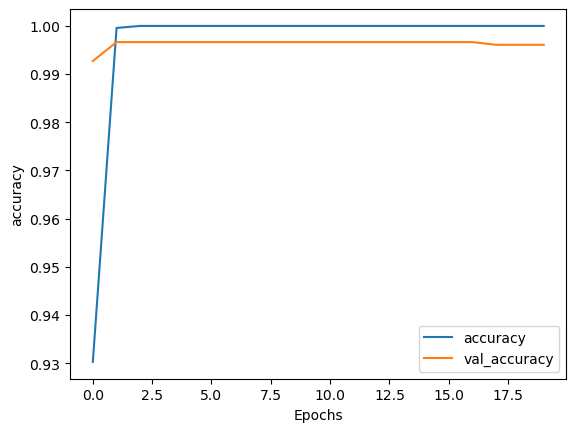

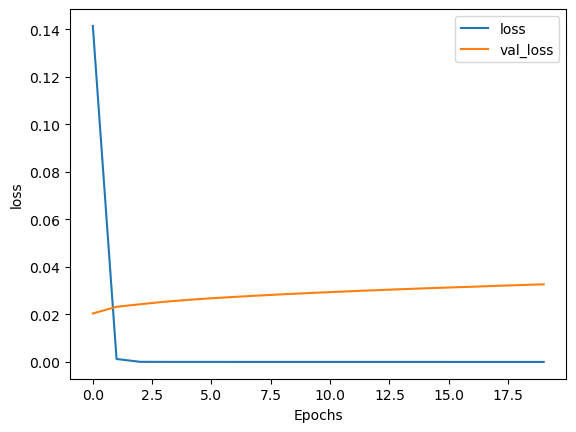

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_GRU_history, 'accuracy')
plot_graphs(model_GRU_history, 'loss')

The optimal model, based on validation loss, is loaded for further use.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_bi_GRU = load_model(checkpoint_path)

The model's performance is evaluated on the validation dataset.

In [ ]:
# Check the results
model_bi_GRU_ev = model_bi_GRU.evaluate(X_valid, y_valid)
model_bi_GRU_loss = model_bi_GRU_ev[0]
model_bi_GRU_loss

56/56 [==============================] - 2s 6ms/step - loss: 0.0107 - accuracy: 0.9938


0.010660373605787754

The model predicts class probabilities on the validation dataset, which are then transformed into class predictions.

In [ ]:
# Make predictions on the validation data
model_bi_GRU_pred_probs = model_bi_GRU.predict(X_valid)
model_bi_GRU_pred_probs.shape, model_bi_GRU_pred_probs[:10]

56/56 [==============================] - 1s 5ms/step


((1786, 1),
 array([[9.9999869e-01],
        [3.7285022e-06],
        [9.9992514e-01],
        [9.9999797e-01],
        [3.8864973e-06],
        [9.9999976e-01],
        [7.2025265e-05],
        [3.9101087e-06],
        [1.3540396e-06],
        [9.9999940e-01]], dtype=float32))

In [ ]:
# Convert prediction probabilities to labels
model_bi_GRU_preds = tf.squeeze(tf.round(model_bi_GRU_pred_probs))
model_bi_GRU_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Various performance metrics, such as accuracy, precision, recall, and the F1-score, are computed for model evaluation.

In [ ]:
# Calcuate model_bi_GRU results
model_bi_GRU_results = calculate_results(y_true=y_valid,
                                    y_pred=model_bi_GRU_preds,
                                        loss=model_bi_GRU_loss)
model_bi_GRU_results

{'accuracy': 99.38409854423293,
 'precision': 0.9938908793256536,
 'recall': 0.9938409854423292,
 'f1': 0.9938406899956574,
 'loss': 0.010660373605787754}

The model's performance is compared with that of the baseline and the bidirectional GRU models.

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_bi_GRU_results)

Baseline accuracy: 98.04, New accuracy: 99.38, Difference: 1.34
Baseline precision: 0.98, New precision: 0.99, Difference: 0.01
Baseline recall: 0.98, New recall: 0.99, Difference: 0.01
Baseline f1: 0.98, New f1: 0.99, Difference: 0.01


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_bi_GRU.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list


56/56 [==============================] - 0s 5ms/step


To visualize the model's classification performance, a confusion matrix is generated. Its readability is enhanced through a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[896,   1],
       [ 10, 879]])

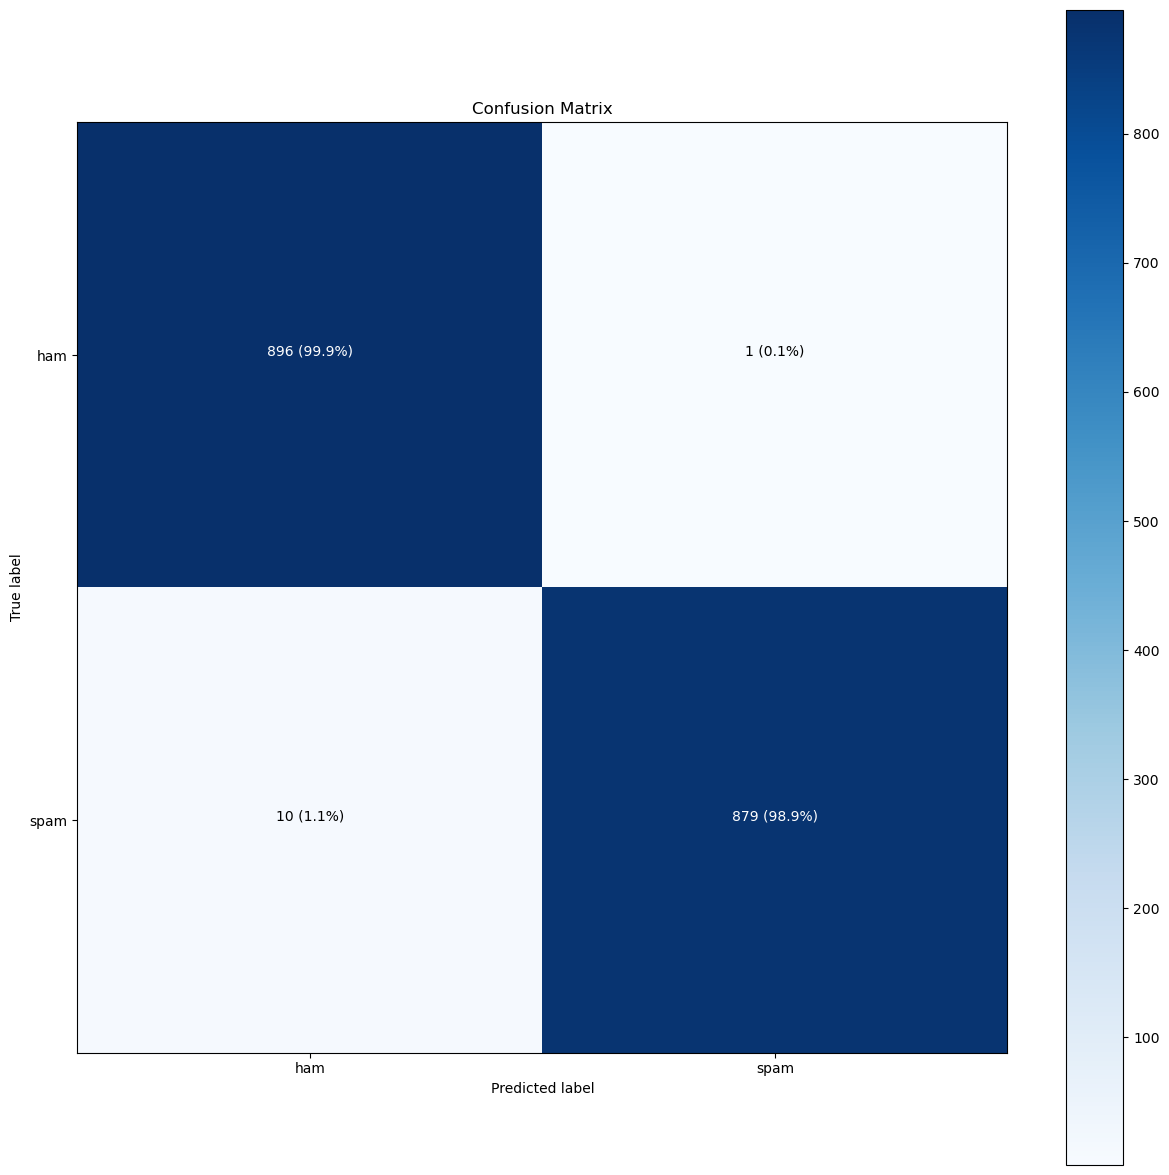

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Finally, the function 'show_random_predictions' is invoked to generate and display predictions on random samples.

In [ ]:
show_random_predictions(model_bi_GRU,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 27ms/step

Sample 1:
Text: im office now will call ltgt min
True: ham 
 Predicted: ham

Sample 2:
Text: got <OOV> <OOV> one quite ex
True: ham 
 Predicted: ham

Sample 3:
Text: aiyo please got time meh
True: ham 
 Predicted: ham

Sample 4:
Text: free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
True: spam 
 Predicted: spam

Sample 5:
Text: 3 free tarot text find love life now try 3 free text chance 85555 16 3 free msg 150
True: spam 
 Predicted: spam

Sample 6:
Text: good hear
True: ham 
 Predicted: ham

Sample 7:
Text: ur chance win 250 cash every wk txt play 83370 tscs wwwmusictrivianet custcare 08715705022 1x150pwk
True: spam 
 Predicted: spam

Sample 8:
Text: ou guaranteed latest nokia phone 40gb ipod mp3 player 500 prize txt word collect no 83355 ibhltd ldnw15h 150pmtmsgrcvd18
True: spam 
 Predicted: spam

Sample 9:
Text: message free welcome new improved

**Model: Conv1D**

The following code block constructs a 1D Convolutional Neural Network (CNN) model for binary text classification. It begins by setting a random seed for reproducibility and defining the parameters of the model. The process starts with an input layer that accepts sequences of word indices. These indices are then transformed into dense vectors by an Embedding layer. A Conv1D layer, specified with a certain number of filters and kernel size, applies convolution operations on these sequences. The spatial dimensions of the output are then reduced by a GlobalMaxPooling1D layer. Subsequently, a Dense layer with 'relu' activation is added. Lastly, an output layer with a 'sigmoid' activation function is included, which is suitable for binary classification.

In [ ]:
from tensorflow.keras import layers

# Parameters
embedding_dim = 300
filters = 64
kernel_size = 5

tf.random.set_seed(42)

# Input layer
inputs = layers.Input(shape=(X_train.shape[1],), dtype="int32")

# Create an embedding of the numerized numbers
x = layers.Embedding(input_dim=max_vocab_length,
                     output_dim=embedding_dim,
                     embeddings_initializer="uniform",
                     input_length=max_length,
                     name="embedding_2")(inputs)
# Conv1D layer
x = layers.Conv1D(filters, kernel_size, activation='relu')(x)
# GlobalMaxPooling1D layer
x = layers.GlobalMaxPooling1D()(x)
# Dense layer
x = layers.Dense(512, activation='relu')(x)
# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)
# Create the model
model_conv = tf.keras.Model(inputs, outputs)



The model is then compiled with the 'adam' optimizer and 'binary_crossentropy' loss function, and the model summary is printed.

In [ ]:
# Set the training parameters
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 26)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 26, 300)           2100000   
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            96064     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_23 (Dense)            (None, 512)               33280     
                                                                 
 dense_24 (Dense)            (None, 1)                 513       
                                                           

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_conv"

cc = create_checkpoint_callback(checkpoint_path)

The model_conv is fit to the training data (X_train and y_train) for 20 epochs, with validation data (X_valid and y_valid) used for evaluation. The training progress is recorded in history_conv1d, and the defined callbacks (cc) are utilized during training.

In [ ]:
NUM_EPOCHS = 20

# Train the model
history_conv1d = model_conv.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_valid, y_valid),callbacks=[cc])

Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9604
Epoch 1: val_loss improved from inf to 0.03831, saving model to best_model_conv
224/224 [==============================] - 19s 78ms/step - loss: 0.1143 - accuracy: 0.9604 - val_loss: 0.0383 - val_accuracy: 0.9933
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 2: val_loss did not improve from 0.03831
224/224 [==============================] - 4s 18ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0563 - val_accuracy: 0.9944
Epoch 3/20
220/224 [============================>.] - ETA: 0s - loss: 1.0457e-04 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.03831
224/224 [==============================] - 3s 13ms/step - loss: 1.0428e-04 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9944
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 3.2488e-05 - accuracy: 1.0000
Epoch 4: val_loss did not improve

After training, the model's accuracy and loss history are plotted over the epochs.

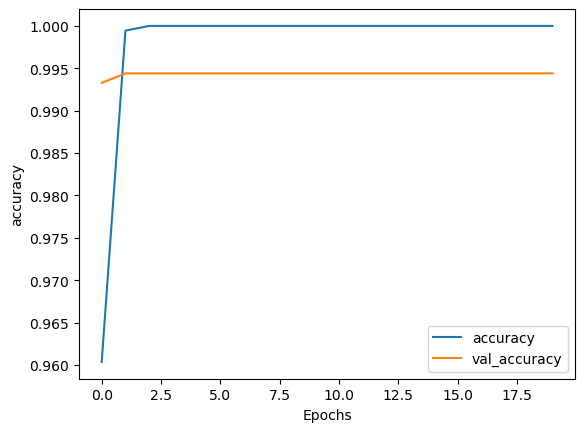

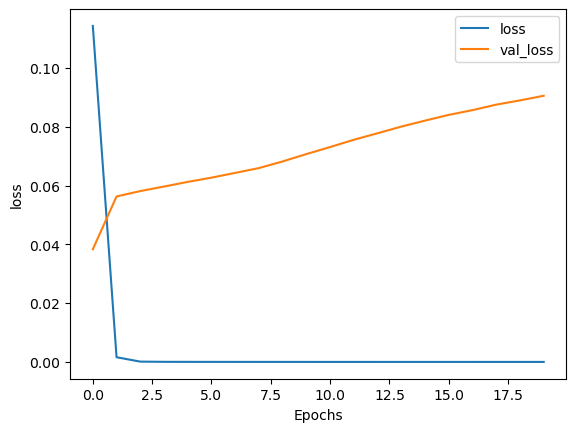

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv1d, 'accuracy')
plot_graphs(history_conv1d, 'loss')

The best-performing model, determined by validation loss, is loaded for future use.

In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_conv = load_model(checkpoint_path)

The model is evaluated on the validation set, after which probabilities are predicted and transformed into class predictions.

In [ ]:
# Check the results
model_conv_ev = model_conv.evaluate(X_valid, y_valid)
model_conv_loss = model_conv_ev[0]
model_conv_loss

56/56 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9933


0.038308173418045044

In [ ]:
# Make predictions with the model
model_conv_pred_probs = model_conv.predict(X_valid)
model_conv_pred_probs[:10]

56/56 [==============================] - 0s 2ms/step


array([[9.9950027e-01],
       [6.0865632e-04],
       [9.9911553e-01],
       [9.9928671e-01],
       [6.8796589e-04],
       [9.9985635e-01],
       [1.4964280e-04],
       [6.8383466e-04],
       [9.7978982e-06],
       [9.9805838e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_conv_preds = tf.squeeze(tf.round(model_conv_pred_probs))
model_conv_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Performance metrics such as accuracy, precision, recall, and the F1-score are calculated for model evaluation.

In [ ]:
# Calculate model performance metrics
model_conv_results = calculate_results(y_valid, model_conv_preds, loss=model_conv_loss)
model_conv_results

{'accuracy': 99.32810750279955,
 'precision': 0.9933426105135992,
 'recall': 0.9932810750279956,
 'f1': 0.9932806958409405,
 'loss': 0.038308173418045044}

Performance comparisons are made between the baseline and the convolutional model.

In [ ]:
# Compare model to baseline
compare_baseline_to_new_results(baseline_results, model_conv_results)

Baseline accuracy: 98.04, New accuracy: 99.33, Difference: 1.29
Baseline precision: 0.98, New precision: 0.99, Difference: 0.01
Baseline recall: 0.98, New recall: 0.99, Difference: 0.01
Baseline f1: 0.98, New f1: 0.99, Difference: 0.01


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_conv.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 0s 2ms/step


A confusion matrix is created to visualize the classification model's performance, and a custom function enhances the matrix's readability.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[896,   1],
       [ 11, 878]])

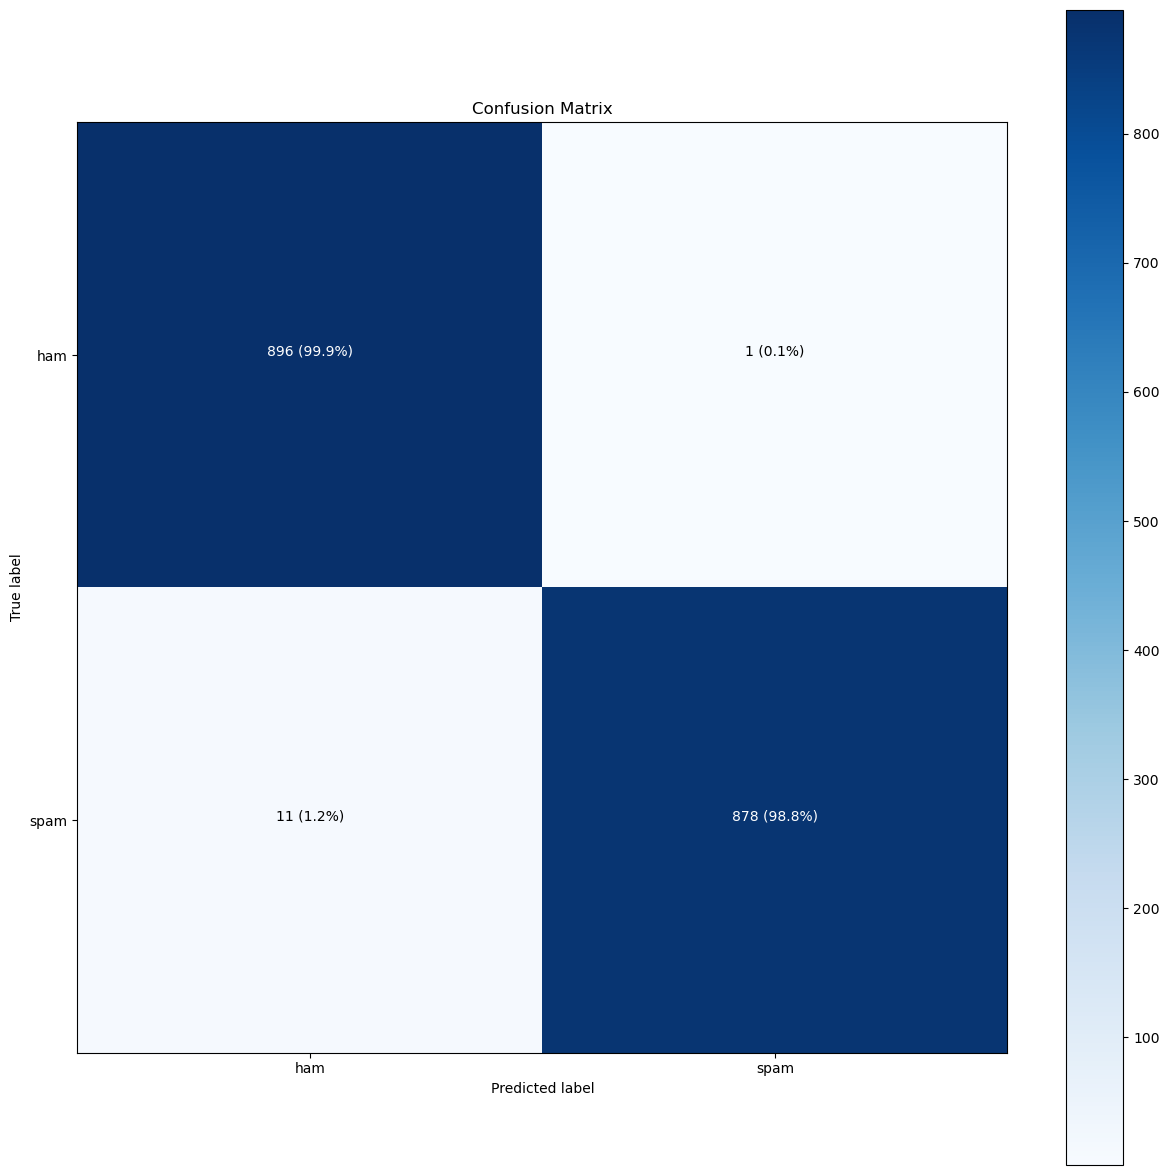

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Then, the 'show_random_predictions' function generates and displays predictions on random samples.

In [ ]:
show_random_predictions(model_conv,
                   X_valid,
                   y_valid,
                   tokenizer,
                   num_samples=10,
                   class_names=class_names)

1/1 [==============================] - 0s 20ms/step

Sample 1:
Text: yes posted couple pic fb there still snow outside im just waking
True: ham 
 Predicted: ham

Sample 2:
Text: <OOV> god said oh no another idiot <OOV> oh no competition knew one day two will become <OOV> forever
True: ham 
 Predicted: ham

Sample 3:
Text: hottest pic straight phone see getting wet wanting just xx text pic 89555 now txt cost 150p textoperator g696ga 18 xxx
True: spam 
 Predicted: spam

Sample 4:
Text: marvel mobile play official ultimate spiderman game 450 ur mobile right now text spider 83338 game ll send u free 8ball wallpaper
True: spam 
 Predicted: spam

Sample 5:
Text: private 2003 account statement 07815296484 show 800 unredeemed sim point call 08718738001 identifier code 41782 expires 181104
True: spam 
 Predicted: spam

Sample 6:
Text: aiyo lesson early im still <OOV> haha okie u go home liao den confirm w lor
True: ham 
 Predicted: ham

Sample 7:
Text: today voda number ending 7548 selected rec

**Model: USE**

The following code describes the construction and training of a binary text classification model utilizing Google's Universal Sentence Encoder (USE) from TensorFlow Hub. The USE layer, pre-trained on a vast corpus of data, takes sentences as input and encodes them into high-dimensional vectors. This layer is non-trainable, meaning it retains the pre-trained weights and functions as a feature extractor. The encoded vectors are then passed through a dense layer with 'relu' activation, followed by an output layer with a 'sigmoid' activation function suitable for binary classification. The model is compiled using the Adam optimizer and binary cross-entropy loss function, and the model summary is printed.

In [ ]:
# import tensorflow_hub as hub

# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
tf.random.set_seed(42)

# Create model using the Sequential API
model_USE = tf.keras.Sequential([
sentence_encoder_layer, # take in sentences and then encode them into an embedding
layers.Dense(512, activation="relu"),
layers.Dense(1, activation="sigmoid")
], name="model_USE")

# Compile model
model_USE.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_USE.summary()

Model: "model_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dense_26 (Dense)            (None, 1)                 513       
                                                                 
Total params: 257,060,993
Trainable params: 263,169
Non-trainable params: 256,797,824
_________________________________________________________________


A ModelCheckpoint callback is set to save only the best model, as determined by validation loss.

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_USE"

# Create a ModelCheckpoint callback that saves the model's weights only when the validation accuracy improves
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',
                                      mode='min',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
X_train_tx, y_train

(array(['today voda number ending 1225 selected receive 50award match please call 08712300220 quoting claim code 3100 standard rate app',
        'urgent trying contact u today draw show won 800 prize guaranteed call 09050001295 land line claim a21 valid 12hrs',
        'yup bathe liao', ..., 'teach apps da come college',
        'hey r still online ive finished formatting',
        'picking various point'], dtype=object),
 array([1, 1, 0, ..., 0, 0, 0]))


The model_USE is fit to the training data (X_train_tx and y_train) for 20 epochs, with validation data (X_valid_tx and y_valid) used for evaluation. The training progress is recorded in model_USE_history, and the defined callbacks (cc) are utilized during training.

In [ ]:
# Train a classifier on top of pretrained embeddings
model_USE_history = model_USE.fit(X_train_tx,
                              y_train,
                              epochs=20,
                              validation_data=(X_valid_tx, y_valid),
                              callbacks=[cc])

Epoch 1/20
220/224 [============================>.] - ETA: 0s - loss: 0.1561 - accuracy: 0.9548
Epoch 1: val_loss improved from inf to 0.06604, saving model to best_model_USE
224/224 [==============================] - 16s 56ms/step - loss: 0.1546 - accuracy: 0.9553 - val_loss: 0.0660 - val_accuracy: 0.9782
Epoch 2/20
222/224 [============================>.] - ETA: 0s - loss: 0.0577 - accuracy: 0.9821
Epoch 2: val_loss improved from 0.06604 to 0.05299, saving model to best_model_USE
224/224 [==============================] - 12s 54ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 3/20
221/224 [============================>.] - ETA: 0s - loss: 0.0394 - accuracy: 0.9887
Epoch 3: val_loss improved from 0.05299 to 0.03999, saving model to best_model_USE
224/224 [==============================] - 12s 56ms/step - loss: 0.0395 - accuracy: 0.9887 - val_loss: 0.0400 - val_accuracy: 0.9882
Epoch 4/20
220/224 [============================>.] - ETA: 0s - loss

The model demonstrating the best validation loss is loaded for use in subsequent steps.

In [ ]:
# Load the entire model
model_USE = load_model(checkpoint_path)

Next, the model is evaluated on the validation set, where probabilities are predicted and converted into class predictions.

In [ ]:
# Check the results
model_USE_ev = model_USE.evaluate(X_valid_tx, y_valid)
model_USE_loss = model_USE_ev[0]
model_USE_loss

56/56 [==============================] - 1s 11ms/step - loss: 0.0259 - accuracy: 0.9927


0.025931470096111298

Post-training, the model's performance is assessed by plotting the history of accuracy and loss over the epochs.

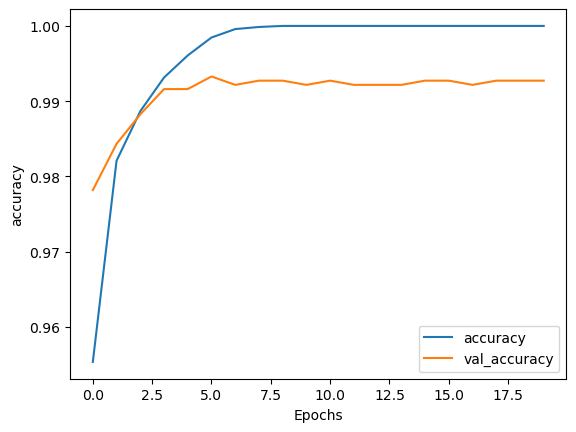

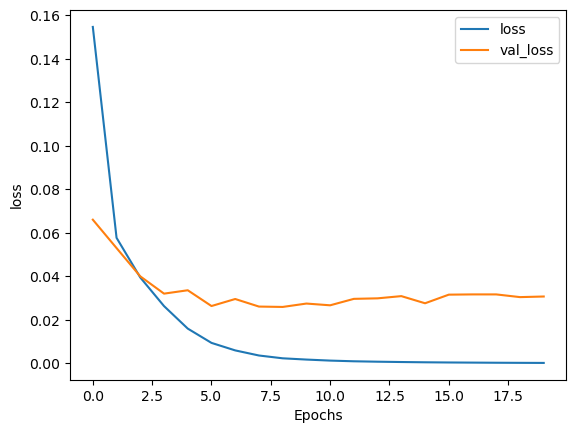

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_USE_history, 'accuracy')
plot_graphs(model_USE_history, 'loss')

In [ ]:
# Make predictions with USE TF Hub model
model_USE_pred_probs = model_USE.predict(X_valid_tx)
model_USE_pred_probs[:10]

56/56 [==============================] - 1s 9ms/step


array([[9.9980432e-01],
       [1.4978190e-06],
       [9.8527098e-01],
       [9.9999785e-01],
       [4.8327089e-11],
       [9.9999988e-01],
       [2.1427344e-03],
       [4.5064345e-07],
       [1.0188190e-06],
       [9.9904841e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_USE_preds = tf.squeeze(tf.round(model_USE_pred_probs))
model_USE_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Various performance metrics such as accuracy, precision, recall, and the F1-score are calculated for the model.

In [ ]:
# Calculate model performance metrics
model_USE_results = calculate_results(y_valid, model_USE_preds, loss=model_USE_loss)
model_USE_results

{'accuracy': 99.27211646136618,
 'precision': 0.9928260702234428,
 'recall': 0.9927211646136618,
 'f1': 0.9927210162881864,
 'loss': 0.025931470096111298}

A comparison of the baseline and USE models is then performed based on these metrics.

In [ ]:
# Compare model to baseline
compare_baseline_to_new_results(baseline_results, model_USE_results)

Baseline accuracy: 98.04, New accuracy: 99.27, Difference: 1.23
Baseline precision: 0.98, New precision: 0.99, Difference: 0.01
Baseline recall: 0.98, New recall: 0.99, Difference: 0.01
Baseline f1: 0.98, New f1: 0.99, Difference: 0.01


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_USE.predict(X_valid_tx)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 1s 10ms/step


A confusion matrix is created to offer a visual perspective of the classification model's performance, which is further refined for readability using a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[884,  13],
       [  0, 889]])

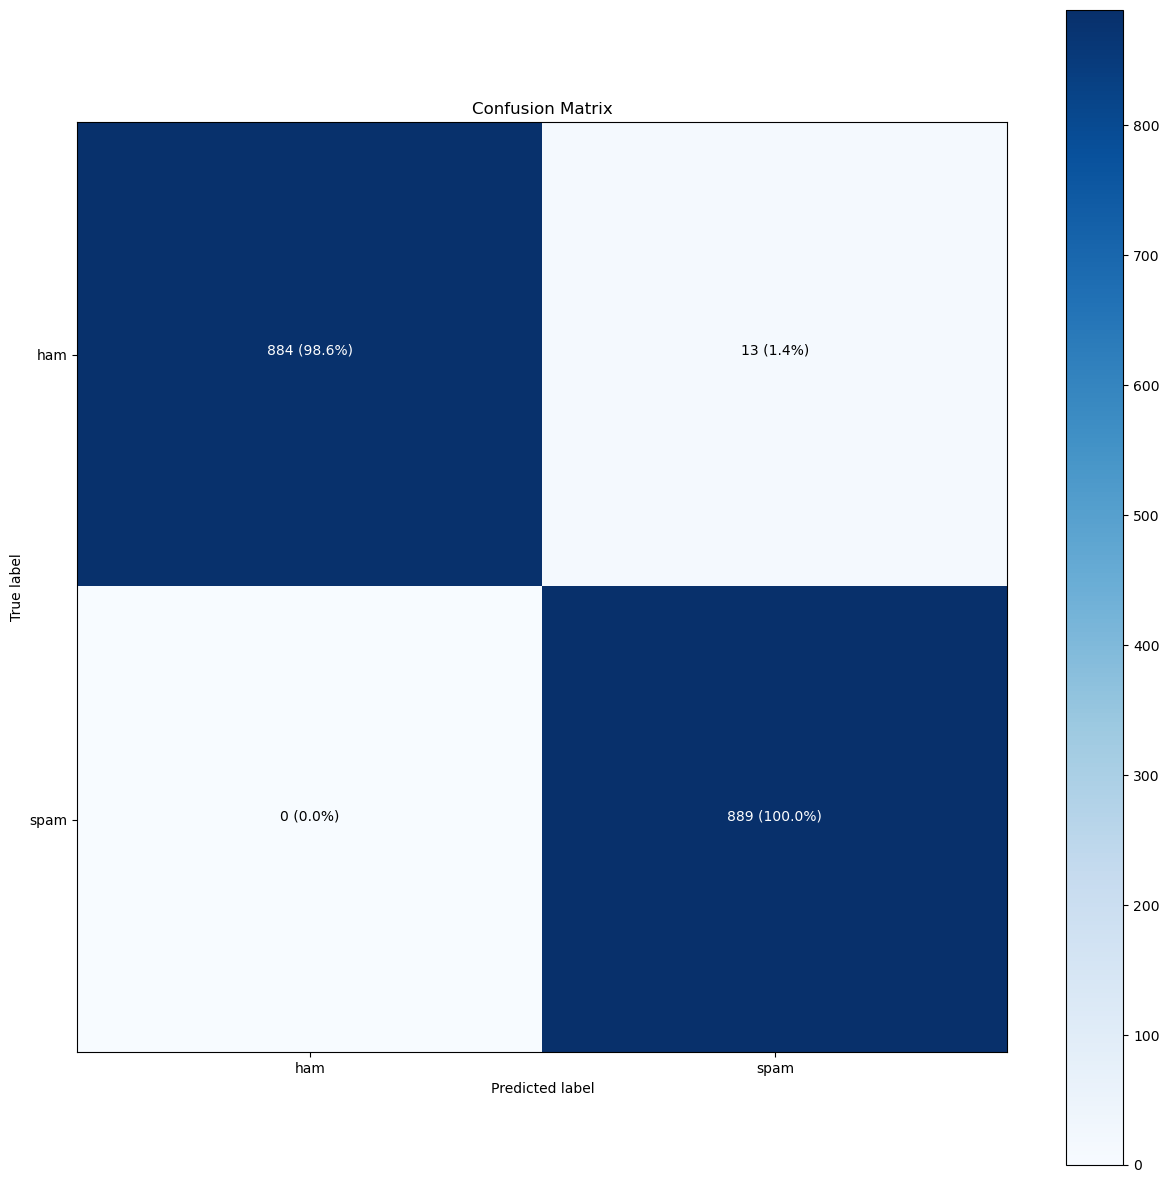

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The function '`random_predictions`' generates and displays predictions on random samples specifically model USE.

In [ ]:
def random_predictions(model, val_padded_seq, val_labels, num_samples=5, class_names=None):
    # Check if it's binary or multi-class classification
    num_classes = val_labels.shape[1] if len(val_labels.shape) > 1 else 2
    is_binary_classification = num_classes == 2

    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(val_padded_seq)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = val_padded_seq[random_indices]
    random_y_samples = val_labels[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)

    if is_binary_classification:
        y_pred = np.squeeze(np.round(y_pred_probs).astype(int))
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text = random_X_samples[i]
        true_label = np.argmax(random_y_samples[i]) if not is_binary_classification else np.squeeze(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)

In [ ]:
random_predictions(model_USE,
                   X_valid_tx,
                   y_valid,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 26ms/step

Sample 1:
Text: won guaranteed 1000 cash 2000 prize claim yr prize call customer service representative 08714712394 10am7pm
True: spam 
 Predicted: spam

Sample 2:
Text: just broke list reason nobody town cant tell shes sarcastic just faggy
True: ham 
 Predicted: ham

Sample 3:
Text: hear loud scream ltgt minute cause gyno will shoving thing dont belong
True: ham 
 Predicted: ham

Sample 4:
Text: contacted dating service someone know find call land line 09050000878 pobox45w2tg150p
True: spam 
 Predicted: spam

Sample 5:
Text: u coming back 4 dinner rite dad ask re confirm wif u
True: ham 
 Predicted: ham

Sample 6:
Text: hows street end library walk
True: ham 
 Predicted: ham

Sample 7:
Text: buying today no need c meh
True: ham 
 Predicted: ham

Sample 8:
Text: december mobile 11mths entitled update latest colour camera mobile free call mobile update vco free 08002986906
True: spam 
 Predicted: spam

Sample 9:
Text: tee hee off lect

**Model: nnlm-en-dim128-with-normalization**


This next block of code builds a sequential Neural Network model in TensorFlow Keras, using a pre-trained embedding layer from TensorFlow Hub. The model leverages Google's NNLM (Neural Network Language Model) with 128 dimensions and normalization for the embedding layer, which converts input text into fixed-size vectors. The model allows for embedding training and employs a Dropout layer to prevent overfitting by randomly nullifying 40% input units during training. A final Dense layer with a sigmoid activation function provides binary classification.

In [ ]:
from tensorflow.keras.layers import Dropout

# embedding_url = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
embedding_url = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"

model_NN = Sequential()
model_NN.add(hub.KerasLayer(embedding_url, input_shape=(), dtype=tf.string, trainable=True))
model_NN.add(Dropout(0.4))
model_NN.add(Dense(1, activation="sigmoid"))
model_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 124,642,817
Trainable params: 124,642,817
Non-trainable params: 0
_________________________________________________________________


This next line compiles the neural network model (model_NN) using the RMSprop optimizer and binary cross-entropy loss function. It also specifies that the model's performance should be evaluated using accuracy as a metric.

In [ ]:
model_NN.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

 This line creates a ModelCheckpoint callback (cc). The callback monitors the validation accuracy (val_loss) during training and saves the model's weights to the specified checkpoint_path only when the validation loss decreases.

In [ ]:
# Define the checkpoint path
checkpoint_path = "best_model_nn"

# Create a ModelCheckpoint callback that saves the model's weights only when the validation accuracy improves
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',
                                      mode='min',
                                      save_best_only=True,
                                      verbose=1)


The fit method is called to train the neural network model. It takes the training data (X_train_tx and y_train) and runs for 20 epochs. The validation_data parameter is set to evaluate the model's performance on the validation data (X_valid_tx and y_valid). The callbacks argument is provided with the cc callback, which triggers the model checkpointing process during training.

In [ ]:
model_NN_history = model_NN.fit(X_train_tx,
                              y_train,
                              epochs=20,
                              validation_data=(X_valid_tx, y_valid),
                              callbacks=[cc])


Epoch 1/20
224/224 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.8901
Epoch 1: val_loss improved from inf to 0.18384, saving model to best_model_nn
224/224 [==============================] - 18s 75ms/step - loss: 0.3636 - accuracy: 0.8901 - val_loss: 0.1838 - val_accuracy: 0.9563
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9627
Epoch 2: val_loss improved from 0.18384 to 0.10573, saving model to best_model_nn
224/224 [==============================] - 10s 43ms/step - loss: 0.1355 - accuracy: 0.9627 - val_loss: 0.1057 - val_accuracy: 0.9703
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 0.0833 - accuracy: 0.9779
Epoch 3: val_loss improved from 0.10573 to 0.07624, saving model to best_model_nn
224/224 [==============================] - 9s 40ms/step - loss: 0.0833 - accuracy: 0.9779 - val_loss: 0.0762 - val_accuracy: 0.9787
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 0.

After training is complete, we load the entire model from the saved checkpoint path (checkpoint_path).

In [ ]:
# Load the entire model
model_NN = load_model(checkpoint_path)

In [ ]:
# Check the results
model_NN_ev = model_NN.evaluate(X_valid_tx, y_valid)
model_NN_loss = model_NN_ev[0]
model_NN_loss

56/56 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9944


0.01526621449738741

Post-training, the model's performance is assessed by plotting the history of accuracy and loss over the epochs.

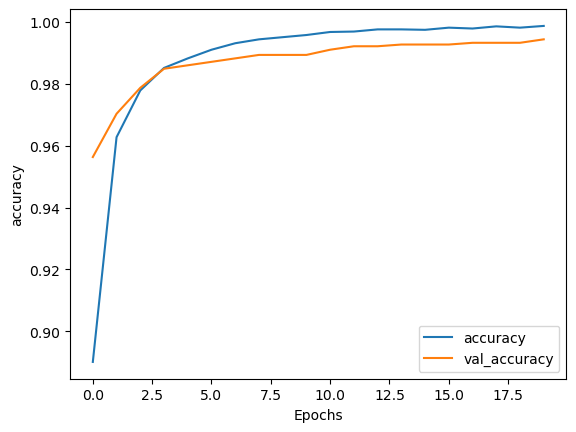

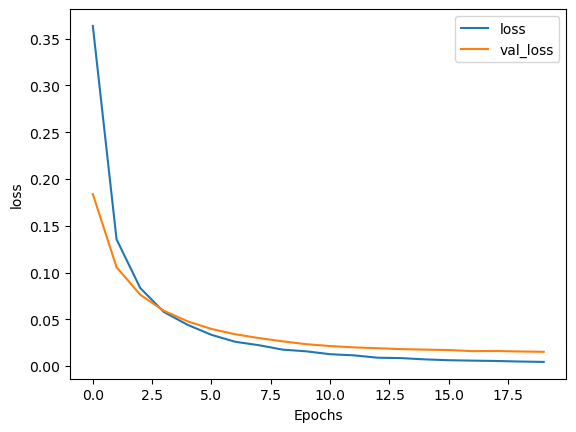

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_NN_history, 'accuracy')
plot_graphs(model_NN_history, 'loss')

Next, the model is evaluated on the validation set, where probabilities are predicted and converted into class predictions.

In [ ]:
# Make predictions with the model
model_NN_pred_probs = model_NN.predict(X_valid_tx)
model_NN_pred_probs[:10]

56/56 [==============================] - 0s 2ms/step


array([[9.9903190e-01],
       [2.7177006e-05],
       [9.9580246e-01],
       [9.9878973e-01],
       [1.8901199e-08],
       [1.0000000e+00],
       [4.9143295e-05],
       [3.7614981e-08],
       [3.1107692e-03],
       [9.9996853e-01]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_NN_preds = tf.squeeze(tf.round(model_NN_pred_probs))
model_NN_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1.], dtype=float32)>

Various performance metrics such as accuracy, precision, recall, and the F1-score are calculated for the model.

In [ ]:
# Calculate model performance metrics
model_NN_results = calculate_results(y_valid, model_NN_preds,loss=model_NN_loss)
model_NN_results

{'accuracy': 99.44008958566629,
 'precision': 0.9944631773265554,
 'recall': 0.9944008958566629,
 'f1': 0.9944008607502726,
 'loss': 0.01526621449738741}

A comparison of the baseline and NNLM model is then performed based on these metrics.

In [ ]:
# Compare model to baseline
compare_baseline_to_new_results(baseline_results, model_NN_results)

Baseline accuracy: 98.04, New accuracy: 99.44, Difference: 1.40
Baseline precision: 0.98, New precision: 0.99, Difference: 0.01
Baseline recall: 0.98, New recall: 0.99, Difference: 0.01
Baseline f1: 0.98, New f1: 0.99, Difference: 0.01


In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_NN.predict(X_valid_tx)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 0s 2ms/step


A confusion matrix is created to offer a visual perspective of the classification model's performance, which is further refined for readability using a custom function.

In [ ]:
# Check out the non-prettified confusion matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[887,  10],
       [  0, 889]])

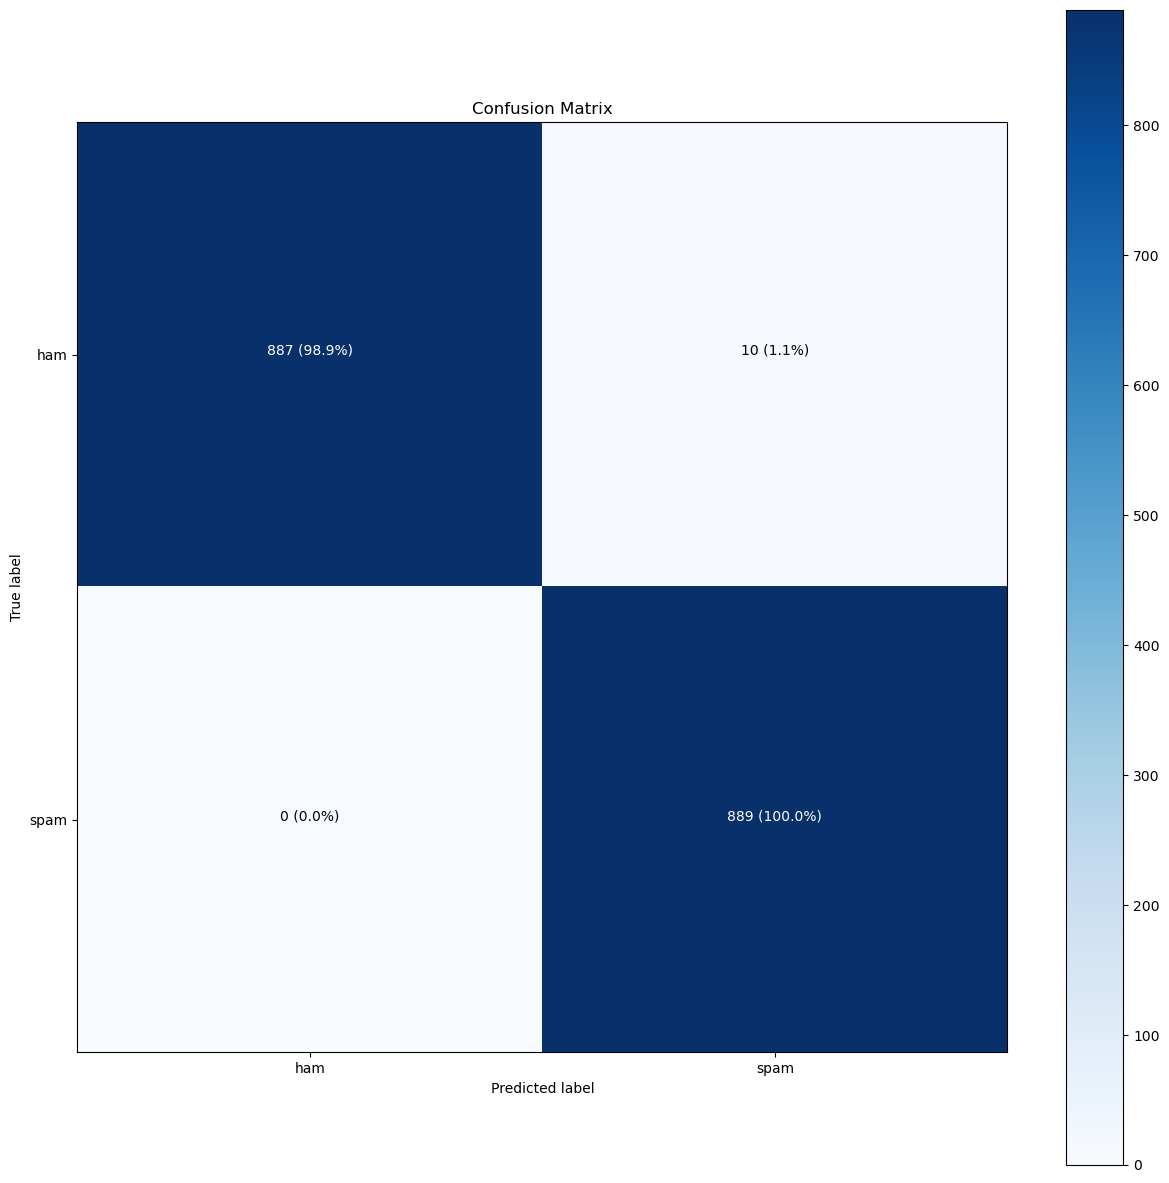

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The function '`random_predictions`' generates and displays predictions on random samples specifically model NNLM.

In [ ]:
random_predictions(model_NN,
                   X_valid_tx,
                   y_valid,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 20ms/step

Sample 1:
Text: mobile numberpls sm ur mail idconvey regard achanammarakheshqatar
True: ham 
 Predicted: spam

Sample 2:
Text: shall start hear
True: ham 
 Predicted: ham

Sample 3:
Text: thx will well month
True: ham 
 Predicted: ham

Sample 4:
Text: interflora not late order interflora flower christmas call 0800 505060 place order midnight tomorrow
True: spam 
 Predicted: spam

Sample 5:
Text: call 08702490080 tell u 2 call 09066358152 claim 5000 prize u 2 enter ur mobile personal detail prompt careful
True: spam 
 Predicted: spam

Sample 6:
Text: cold dont sad dear
True: ham 
 Predicted: ham

Sample 7:
Text: ok give 5 minute think see btw youre alibi cutting hair whole time
True: ham 
 Predicted: ham

Sample 8:
Text: fancy shag dointerested sextextukcom txt xxuk suzy 69876 txts cost 150 per msg tncs website x
True: spam 
 Predicted: spam

Sample 9:
Text: text meet someone sexy today u can find date even flirt u join 4 just 10p rep

**Comparing all models**

The following section compares and visualizes the performance of various models. Initially, the evaluation results from each model are compiled into a DataFrame for comparison. Metrics such as F1-score are used to sort the models in terms of performance.

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "Simple Dense": model_dense_results,
                                  "LSTM": model_1LSTM_results,
                                  "Bidirectional LSTM": model_lstm_results,
                                  "GRU": model_GRU_results,
                                  "Bidirectional GRU": model_bi_GRU_results,
                                  "Conv1D": model_conv_results,
                                  "USE": model_USE_results,
                                  "NNLM": model_NN_results,
                                  })


all_model_results = all_model_results.transpose()
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results=all_model_results.sort_values(by="loss", ascending=True)
all_model_results


,accuracy,precision,recall,f1,loss
Simple Dense,1.000000,1.000000,1.000000,1.000000,0.003321
LSTM,0.998320,0.998326,0.998320,0.998320,0.004826
Bidirectional GRU,0.993841,0.993891,0.993841,0.993841,0.010660
Bidirectional LSTM,0.994961,0.994966,0.994961,0.994961,0.012833
NNLM,0.994401,0.994463,0.994401,0.994401,0.015266
GRU,0.992721,0.992825,0.992721,0.992721,0.020386
USE,0.992721,0.992826,0.992721,0.992721,0.025931
Conv1D,0.993281,0.993343,0.993281,0.993281,0.038308
baseline,0.980403,0.980477,0.980403,0.980403,NaN


The summary of the model performance results revealed distinct variations in accuracy, precision, recall, F1 score, and loss among the different models. The Simple Dense model stood out as the best-performing model, achieving perfect accuracy, precision, recall, and F1 score all at 1.0, accompanied by the smallest loss of 0.003321. The LSTM model followed closely with an accuracy, precision, recall, and F1 score of approximately 0.998 and a slightly higher loss of 0.004826. Bidirectional GRU and Bidirectional LSTM also showed impressive performance, albeit slightly lower than the LSTM model, with similar scores in the range of 0.993 to 0.995 and a marginally higher loss. The NNLM and GRU models also produced high-level performance metrics, ranging around 0.992 to 0.994, with incrementally higher losses. The USE and Conv1D models were on par with GRU, but with an increased loss. Lastly, the baseline model demonstrated the lowest performance metrics in the range of approximately 0.980 and an undefined loss.

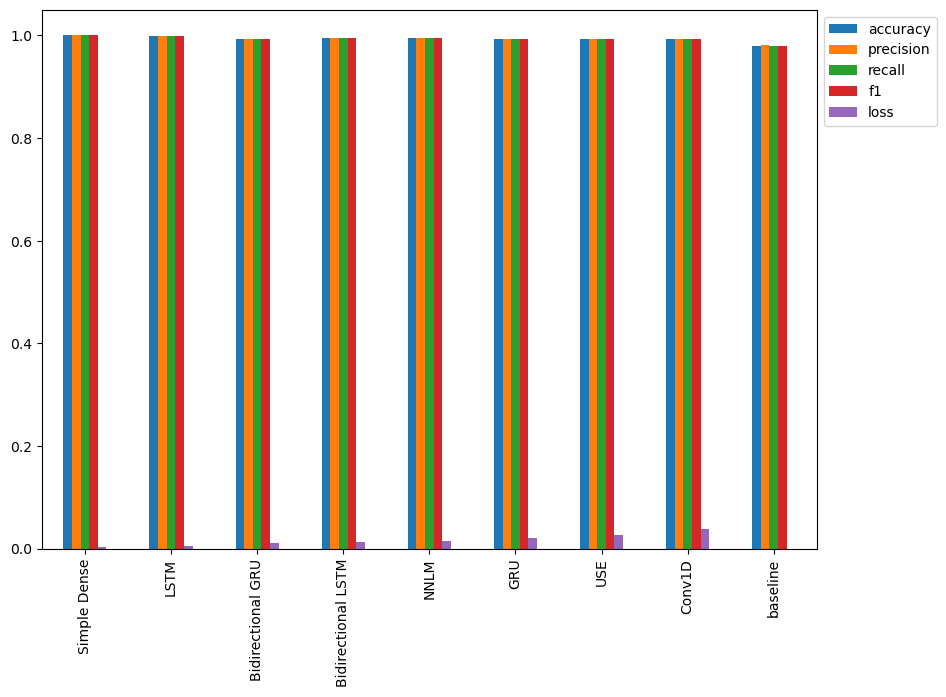

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

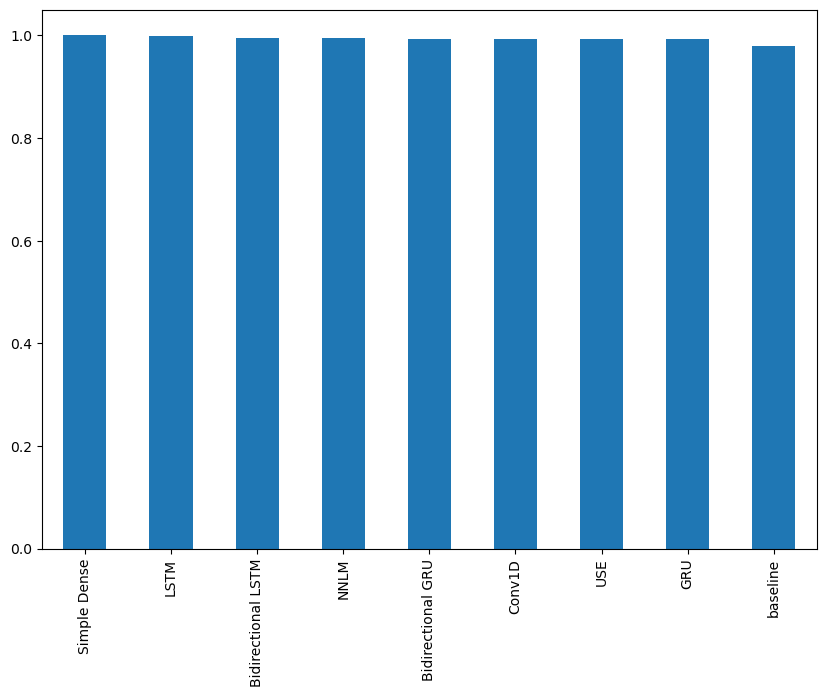

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

**Evaluation Metrics**

Moving forward, we will deploy the Model Dense for further analysis.

In [ ]:
y_true = y_valid.tolist()  # Convert labels to a list
preds = model_dense.predict(X_valid)
y_probs = preds.squeeze().tolist()  # Store the prediction probabilities as a list
y_preds = tf.round(y_probs).numpy().tolist()  # Convert probabilities to class predictions and convert to a list

56/56 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

report = classification_report(y_true, y_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       1.00      1.00      1.00       889

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



**Make Prediction on Text from Wild**

In [ ]:
# Turn Text into string
textx = "text meet someone sexy today u can find date even flirt, call customer service 78990gh3. xxx9893jkdljk"

In [ ]:
# Turn Text into string
textx2 = "thanks ringtone order ref number r836 mobile will charged 450 tone not arrive please call customer service 09065069154"

In [ ]:
# Turn Text into string
textx3 = "The weather today is beautiful, perfect for a walk in the park."

The 'predict_on_sentence' function is used to make predictions on unseen sentences, displaying the predicted class and its corresponding probability.

In [ ]:
def predict_on_sentence(model, sentence, category_reverse_mapping, tokenizer, max_length):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted labels and the prediction probabilities.
    """

    # Convert the sentence into sequences
    sequence = tokenizer.texts_to_sequences([sentence])

    # Pad the sequences to ensure consistent length
    padded_sequence = pad_sequences(sequence, maxlen=max_length)

    # Make the prediction
    pred_prob = model.predict(padded_sequence)
    pred_label = np.round(pred_prob).astype(int)[0]  # Converting to int to match the format of your labels

    # Get the label names of the predicted class
    pred_label_str = category_reverse_mapping[pred_label[0]]  # Use the first element of pred_label
    pred_prob_str = pred_prob[0][0]

    print(f"Prediction: {pred_label_str}")  # Print the predicted label
    print(f"Prediction probability: {pred_prob_str}")  # Print the prediction probabilities
    print(f"Text:\n{sentence}")


In [ ]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_dense,
                    sentence=textx,
                    category_reverse_mapping=class_names,
                    tokenizer=tokenizer,
                    max_length=max_length
                   )

1/1 [==============================] - 0s 26ms/step
Prediction: spam
Prediction probability: 0.9033603668212891
Text:
text meet someone sexy today u can find date even flirt, call customer service 78990gh3. xxx9893jkdljk


In [ ]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_dense,
                    sentence=textx2,
                    category_reverse_mapping=class_names,
                    tokenizer=tokenizer,
                    max_length=max_length)

1/1 [==============================] - 0s 118ms/step
Prediction: spam
Prediction probability: 0.9999998807907104
Text:
thanks ringtone order ref number r836 mobile will charged 450 tone not arrive please call customer service 09065069154


In [ ]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_dense,
                    sentence=textx3,
                    category_reverse_mapping=class_names,
                    tokenizer=tokenizer,
                    max_length=max_length)

1/1 [==============================] - 0s 38ms/step
Prediction: ham
Prediction probability: 1.1282019762859363e-10
Text:
The weather today is beautiful, perfect for a walk in the park.


**Most Wrong Predictions**

The 'Most Wrong Predictions' code segment below allows for a deeper understanding of model errors by identifying and analyzing predictions that deviate most from actual values, assisting in pinpointing model weaknesses and potential areas of improvement. Here, a DataFrame is created with the validation sentences and predictions of the best-performing model, which helps to identify the most incorrect predictions, both false positives and negatives.

In [ ]:
val_df = pd.DataFrame({
    "text": X_valid_tx.tolist(),
    "target": [class_names[label] for label in y_valid],
    "target_label": y_valid.tolist(),
    "pred": [class_names[int(round(prob))] for prob in y_preds],
    "pred_label": [int(round(prob)) for prob in y_preds],
    "pred_prob": y_preds
})
val_df

,text,target,target_label,pred,pred_label,pred_prob
0,updatenow 12mths half price orange line rental 400minscall mobileupd8 08000839402 call2optoutj5q,spam,1,spam,1,1.0
1,dear will reach,ham,0,ham,0,0.0
2,like see xxx pic hot nearly banned uk,spam,1,spam,1,1.0
3,hi ur lookin 4 saucy daytime fun wiv busty married woman free next week chat now 2 sort time 09099726429 janinexx calls1minmobsmorelkpobox177hp51fl,spam,1,spam,1,1.0
4,im school now n ill da lab stuff give call r done,ham,0,ham,0,0.0
...,...,...,...,...,...,...
1781,win 1000 cash prize prize worth 5000,spam,1,spam,1,1.0
1782,unique enough find 30th august wwwareyouuniquecouk,spam,1,spam,1,1.0
1783,won valued vodafone customer computer picked win 150 prize collect easy just call 09061743386,spam,1,spam,1,1.0
1784,yup anything lor u dun wan ok,ham,0,ham,0,0.0


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,target_label,pred,pred_label,pred_prob


Given that the Simple Dense model achieved a 100% accuracy rate on the validation data, this means that there were no incorrect predictions made by the model. Thus, when attempting to identify and analyze the most wrong predictions, as intended in the given code snippet, we find that there is no such instance to consider. The model's perfect accuracy highlights its robust performance and ability to precisely classify the validation data. Nonetheless, it's important to evaluate the model's performance on unseen data to ensure its generalizability, as a 100% accuracy rate might also be indicative of overfitting to the training data.

**The speed/score tradeoff**

The speed-performance trade-off code below helps quantify and visualize the balance between a model's prediction accuracy (performance) and the computational resources required (time taken for predictions), which is critical in optimizing real-world applications.

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(X_valid) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate model prediction times
model_total_pred_time, model_time_per_pred = pred_timer(model_dense, X_valid)
model_total_pred_time, model_time_per_pred

56/56 [==============================] - 0s 2ms/step


(0.4280343170003107, 0.00023966087178068908)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, X_valid_tx)
baseline_total_pred_time, baseline_time_per_pred

(0.06116953899982036, 3.424946192599124e-05)

The time per prediction and F1-score for each model are plotted on a scatter plot to visualize this trade-off.

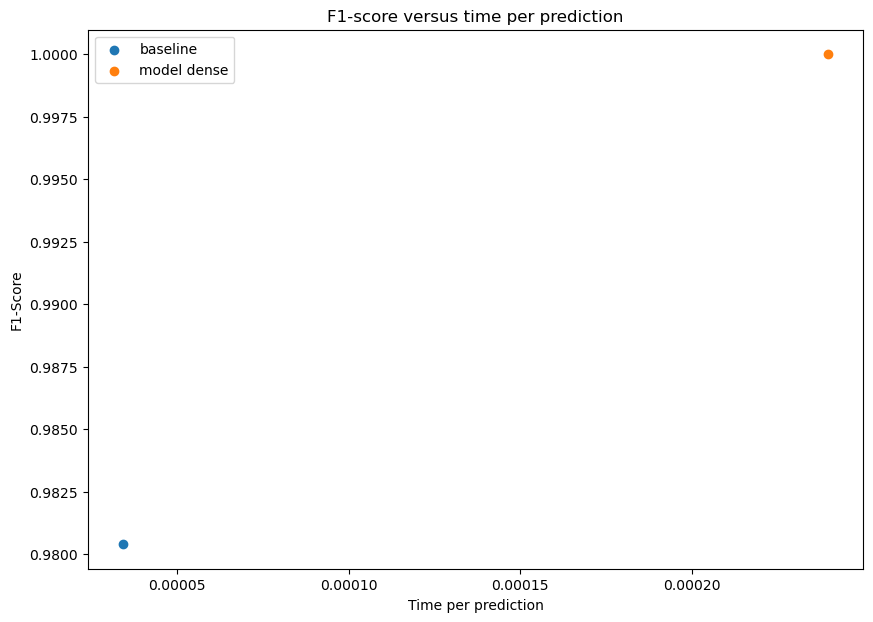

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_time_per_pred, model_dense_results["f1"], label="model dense")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png)
*Ideal position for speed and performance tradeoff model (fast predictions with great results).*

As can be seen, the best-performing model, while significantly improving the F1-score, takes considerably more time per prediction, highlighting a crucial consideration for machine learning applications: balancing model performance and prediction speed.

**Improving model performance: Ensemble Models**

Ensemble methods are a cornerstone of machine learning where multiple models are trained and their predictions are combined, typically leading to a more robust and accurate result compared to a single model. They reduce both bias and variance, provide a way to handle large datasets, and improve generalizability and robustness over a single estimator.

In this project, an ensemble of three models (Bi-LSTM, Dense, and Bi-GRU) is created. The prediction probabilities of these models are added together and the average is calculated (by dividing by 3). The class (label) with the highest mean probability is then selected as the final ensemble prediction. This effectively votes on the most likely class based on the individual model's predictions, hence capitalizing on their collective learning.

In [ ]:
# Get mean pred probs for 3 models
combined_pred_probs = tf.squeeze(model_dense_pred_probs, axis=1) + tf.squeeze(model_bi_GRU_pred_probs, axis=1) + tf.squeeze(model_lstm_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0.], dtype=float32)>

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy

loss_fn = BinaryCrossentropy()
loss = loss_fn(y_valid, combined_pred_probs/3) # Note, this is before rounding
loss_np=loss.numpy()
print('Ensemble model loss: ', loss_np)

Ensemble model loss:  0.0068726307


The following code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models. The code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models.

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(y_valid, combined_preds, loss=loss_np)
ensemble_results

{'accuracy': 99.66405375139978,
 'precision': 0.9966628595238716,
 'recall': 0.9966405375139977,
 'f1': 0.9966404490405687,
 'loss': 0.0068726307}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1,loss
Simple Dense,1.000000,1.000000,1.000000,1.000000,0.003321
LSTM,0.998320,0.998326,0.998320,0.998320,0.004826
Bidirectional GRU,0.993841,0.993891,0.993841,0.993841,0.010660
Bidirectional LSTM,0.994961,0.994966,0.994961,0.994961,0.012833
NNLM,0.994401,0.994463,0.994401,0.994401,0.015266
GRU,0.992721,0.992825,0.992721,0.992721,0.020386
USE,0.992721,0.992826,0.992721,0.992721,0.025931
Conv1D,0.993281,0.993343,0.993281,0.993281,0.038308
baseline,0.980403,0.980477,0.980403,0.980403,NaN
ensemble_results,0.996641,0.996663,0.996641,0.996640,0.006873


In [ ]:
# Convert the accuracy to the same scale as the rest of the results
sorted_df = all_model_results.sort_values(by='loss', ascending=True)
sorted_df

,accuracy,precision,recall,f1,loss
Simple Dense,1.000000,1.000000,1.000000,1.000000,0.003321
LSTM,0.998320,0.998326,0.998320,0.998320,0.004826
ensemble_results,0.996641,0.996663,0.996641,0.996640,0.006873
Bidirectional GRU,0.993841,0.993891,0.993841,0.993841,0.010660
Bidirectional LSTM,0.994961,0.994966,0.994961,0.994961,0.012833
NNLM,0.994401,0.994463,0.994401,0.994401,0.015266
GRU,0.992721,0.992825,0.992721,0.992721,0.020386
USE,0.992721,0.992826,0.992721,0.992721,0.025931
Conv1D,0.993281,0.993343,0.993281,0.993281,0.038308
baseline,0.980403,0.980477,0.980403,0.980403,NaN


After implementing the ensemble model, the performance evaluation shows some intriguing results. The ensemble model was able to outperform most individual models, including Bidirectional GRU, Bidirectional LSTM, NNLM, GRU, USE, Conv1D, and the baseline model. It achieved an accuracy, precision, recall, and F1 score of approximately 0.997, with a corresponding loss of 0.006873, placing it third in terms of performance, only surpassed by the Simple Dense model and the LSTM model.

This highlights the power of ensemble methods, which leverage the strengths of multiple models to improve overall performance. By combining the predictions from multiple models, ensemble methods can achieve better generalization and stability, making them less prone to errors from individual models. In this case, the ensemble model was able to achieve better performance than most of the individual models, demonstrating the value of this approach. Despite its superiority, the ensemble model could not outperform the Simple Dense and LSTM models, suggesting there could be room for further fine-tuning or exploring other ensemble methods to enhance performance.

**Save Model**

In [ ]:
# Save dense model to HDF5 format
model_dense.save("model.h5")

**Load saved model**

In [ ]:
# Load saved model
loaded_model_SavedModel = tf.keras.models.load_model("model.h5")

In [ ]:
# Evaluate loaded model
loaded_model_SavedModel.evaluate(X_valid, y_valid)

56/56 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000


[0.003320741467177868, 1.0]

In [ ]:
loaded_model_SavedModel.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 26, 300)           2100000   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 1)                 301       
                                                                 
Total params: 2,100,301
Trainable params: 2,100,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate loaded SavedModel format
loaded_model_SavedModel.evaluate(X_valid, y_valid)

56/56 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000


[0.003320741467177868, 1.0]